# Project 1 - Employee Attrition

## Introduction:

The goal of this project is to develop a model that lowers the costs associated with hiring and training employees, this is done by focusing on the predicting which employees might leave the company. Within any organisation/company, the approach towards spending decisions every day plays a major role in company success and one of these decisions would be the important investment in people. The hiring process takes up a lot of skills, patience, time and money. 

The following outlines the most common hiring costs (https://toggl.com/blog/cost-of-hiring-an-employee):
1. External Hiring Teams.
2. Internal HR Teams.
3. Career Events.
4. Job boards fees.
5. Background Checks.
6. Onboarding and training.
7. Careers page.
8. Salary and extras.

As it can be seen from the lists above, it can be very difficult to pinpoint precisely the costs that are associated with hiring an employee. With all these rigorous processes already set up for a given company, perhaps there are better questions to ask, such as:
1. Which employee will stay and which will leave?
2. What are the factors that leads to an employee leaving the company and how it can be predicted?

## Breakdown of this Project:
1. Loading in the Dataset.
2. Visualise the data.
3. Dataset preparation (Data cleaning, training and testing splits)
4. Classifier models (Logistic Regression, Neural Networks, Random Forest)
5. Evaluation methodologies (Accuracy, Precision, Recall and F1-Scores)
6. Classifier Model training and its evaluation.

## Dataset:

Link: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

Dataset Description (from source): Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists. 

What Is Attrition? \
Attrition in business describes a gradual but deliberate reduction in staff numbers that occurs as employees retire or resign and are not replaced. The term is also sometimes used to describe the loss of customers or clients as they mature beyond a product or company's target market without being replaced by a younger generation. (ref -> https://www.investopedia.com/terms/a/attrition.asp)

The following shows the dataset's columns:
- Education
- EnvironmentSatisfaction
- JobInvolvement
- JobSatisfaction
- PerformanceRating
- RelationshipSatisfaction
- WorkLifeBalance

## Requirements:
- Numpy
- Pandas
- Seaborn
- Matplotlib
- sk-learn
- os
- tensorflow (or Keras)

## 1 - Setting up the Libraries:

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2 - Load in the Dataset:


In [2]:
# Dataset Filename:
dataset_fileName = 'Human_Resources.csv'

# Set up the Working Directory:
currentDirectory = os.getcwd()
path_to_dataset = currentDirectory + '/Dataset/' + dataset_fileName

In [3]:
# Load in the File: .csv format
employee_data_df = pd.read_csv(path_to_dataset)

### 2.1 - First glance at the dataset: 

Hhave a look at the first 10 rows.

In [4]:
employee_data_df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


Taking a look at the above, there is a column called "Attrition", this would be the column of interest that the model will predict. The remaining columns will therefore be used as predictor features.

Now, let's take a look at the last 10 row.

In [5]:
employee_data_df.tail(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1460,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,...,2,80,0,5,3,1,5,4,0,4
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,...,2,80,1,20,3,3,3,2,2,0
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,...,1,80,1,21,2,2,20,9,9,6
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


### 2.2 - Dataset Statistics:

In [6]:
employee_data_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### 2.3 - Dataset Column Description:

In [7]:
employee_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

__From the data source webpage, the details of the row data are broken down as such for the following columns__:

<img src="Description Images/Column_details.PNG" width="550">

Image Ref -> Self-made


## 3 - Exploratory Data Analysis (EDA):

Exploratory Data Analysis (EDA) is performed to mainly summarise the main characteristices of a dataset. These often employ visual methods, which shows preliminary results what the data can offer before the modeling task.

Exploratory Data Analysis (EDA) are typically used for the following:
- Detection of mistakes
- Checking of assumptions
- Preliminary selection of appropriate models
- Determining relationships among the explanatory variables, and
- Assessing the direction and rough size of relationships between explanatory and outcome variables.

## 3.1 - Inspect the Target Variable: Attrition Column.

The target variable would be the value that the model will try to predict, where in this case, this would be the "Attrition" column. Here, it is a binary pair consisting of "Yes" (where the employee has left the company) and "No" (where the employee has stayed wihtin the company).

### 3.1.1 - Examine how many employees stayed or left:

In [8]:
# Employees that Left the company:
employee_left_df = employee_data_df[ employee_data_df['Attrition'] == "Yes" ]

# Employees that Stayed at the company:
employee_stayed_df = employee_data_df[ employee_data_df['Attrition'] == "No" ]

# Define the total number of employees:
employee_totalCount = len(employee_data_df)

In [9]:
# Find the number of employees that Left:
print('Number of employees that left the company = {}'.format(len(employee_left_df)))

# Find the number of employees that Stayed:
print('Number of employees that stayed with the company = {}'.format(len(employee_stayed_df)))

# Find the percentages: left and Stayed:
print("% of employees that left: {}%".format( round((len(employee_left_df) / employee_totalCount) * 100 , ndigits=3) ))
print("% of employees that stayed: {}%".format( round((len(employee_stayed_df) / employee_totalCount) * 100 , ndigits=3) ))

Number of employees that left the company = 237
Number of employees that stayed with the company = 1233
% of employees that left: 16.122%
% of employees that stayed: 83.878%


An important thing to note here, is that the dataset can be seen to be imbalance, meaning that the target variables are not represented equally. This would also directly influence the accuracy scores negatively, and therefore the F1-score should be used.

### 3.1.2 - Target Variable Statistics: Attrition.

In [10]:
# For employees that left:
employee_left_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,...,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,401.899519,8.452525,1.008244,0.0,580.750572,1.169791,20.099958,0.773405,0.940594,...,1.125437,0.0,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,103.000000,1.000000,1.000000,1.0,1.000000,1.000000,31.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,408.000000,3.000000,2.000000,1.0,514.000000,1.000000,50.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,699.000000,9.000000,3.000000,1.0,1017.000000,3.000000,66.000000,3.000000,1.000000,...,3.000000,80.0,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1092.000000,17.000000,4.000000,1.0,1486.000000,4.000000,84.000000,3.000000,2.000000,...,4.000000,80.0,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1496.000000,29.000000,5.000000,1.0,2055.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [11]:
# For employees that stayed:
employee_stayed_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,...,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,403.208379,8.012633,1.027002,0.0,606.217074,1.071132,20.380754,0.692050,1.117933,...,1.071603,0.0,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,102.000000,1.000000,1.000000,1.0,2.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,477.000000,2.000000,2.000000,1.0,483.000000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,817.000000,7.000000,3.000000,1.0,1022.000000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,1176.000000,13.000000,4.000000,1.0,1574.000000,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


### Observation:

- From the above, the __mean age__ for the employees that stayed is around __37 to 38 years old__, whereas the employees that left, the __mean age__ is around __33 to 34 years old__. 

- It can also be seen that employees that stayed are also getting a higher pay (mean DailyRate = USD 812.50). 

- Employees that stayed also live closer to their workplace.

- Employees that stayed have a higher mean StockOptionLevel at 0.845 vs. those that left as 0.527.

Based on what was observed above, it would be better to visualise these with a correlation chart to provide an overall study.

### 3.2 - Correlations of the Features:

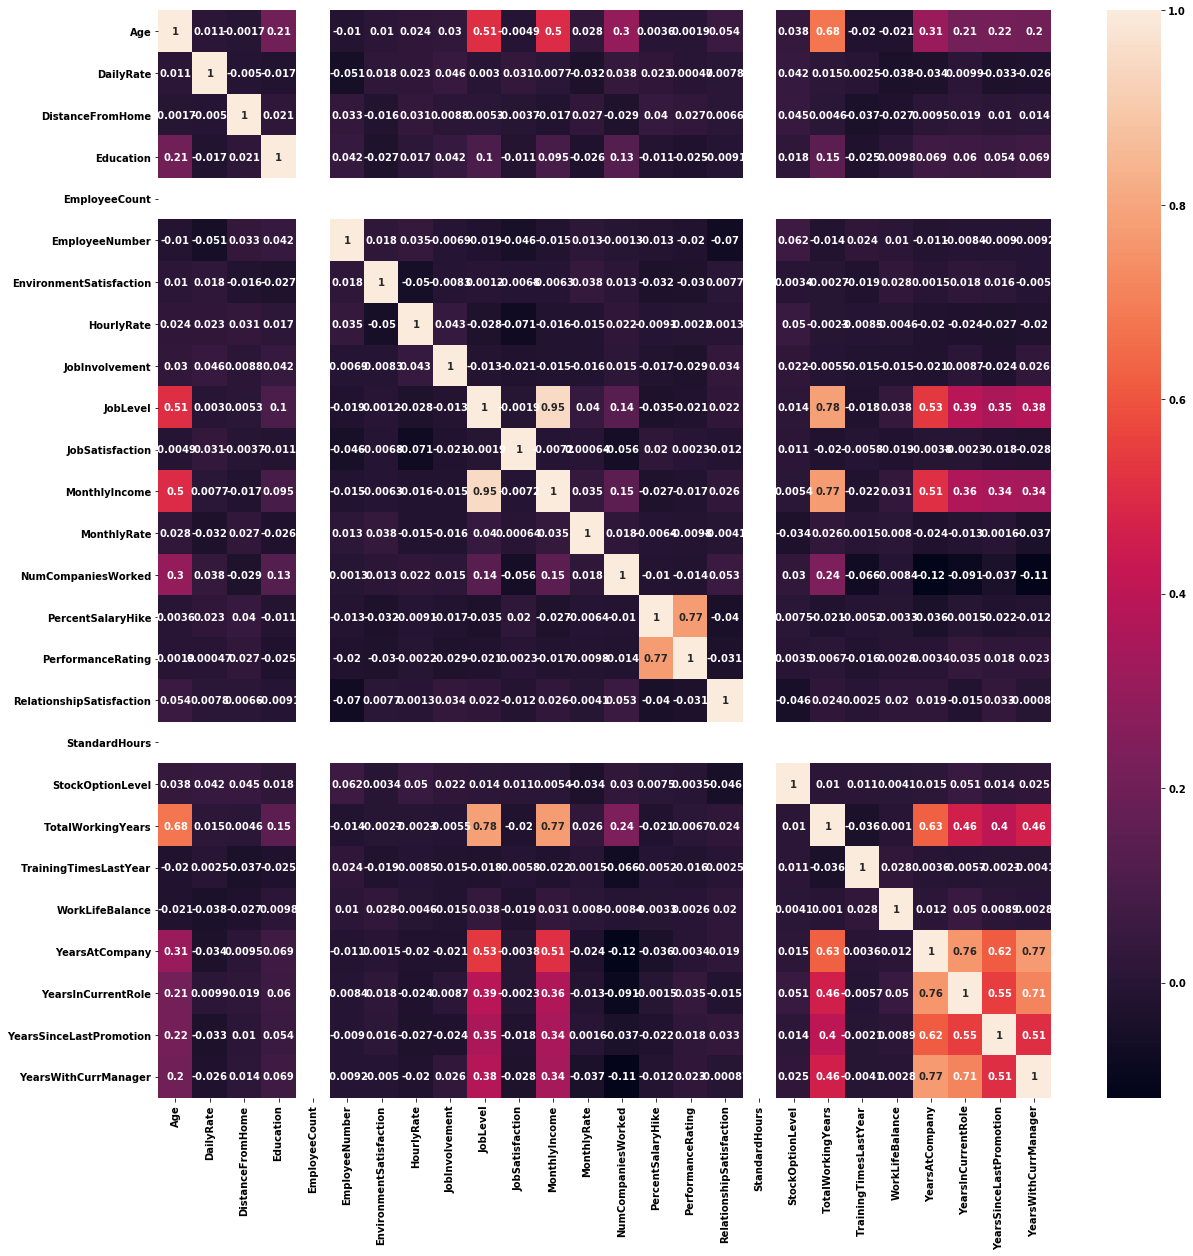

In [12]:
# Instantiate a correlation matrix for plotting:
correlations_employee = employee_data_df.corr()

# Plot with HeatMap:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data=correlations_employee, annot=True)

### Observation:

From the heatmap key on the right, it shows the lighter the heatmap colour, the better correlated the features are to each other.

Observed outcomes examples:
- There is a strong correlation between the TotalWorkingYears and JobLevel and MonthlyIncome.
- There is a strong correlation between PerformanceRating and PercentSalaryHike.
- There is a good correlation between YearsAtCompany between JobLevel and MonthlyIncome.
- There is a strong correlation between YearsInCurrentRole and YearsAtCompany.
- There is a strong correlation between YearsWithCurrManager and YearsAtCompany and YearsInCurrentRole.
- A strong correlation between MonthlyIncome and JobLevel.

### 3.3 - Visualise the relationship between: 
- Age and Attrition.

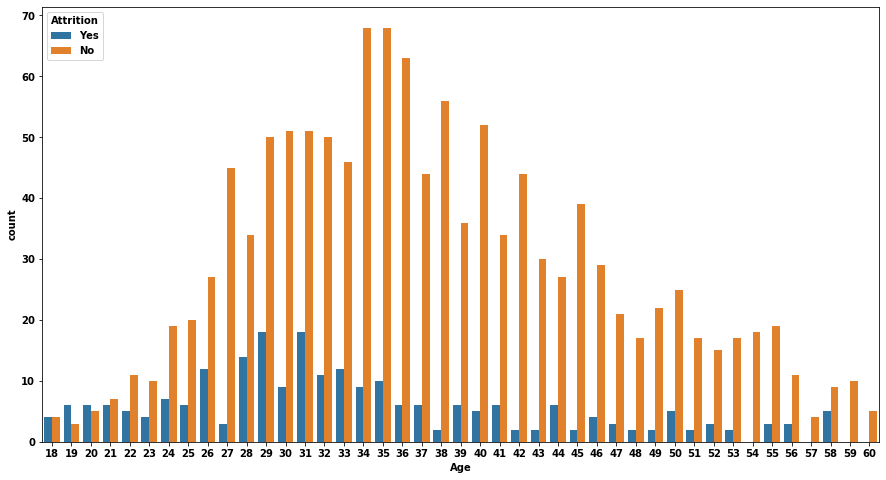

In [13]:
plt.figure(figsize=(15,8))
sns.countplot(x= "Age", hue='Attrition', data=employee_data_df)

### Observation:

It can be seen that around 20 employees around the age of 29 years old would leave the company while 50 employees in the same age would stay with the company. On the other hand, as the age of the employees increases, they are less likely to leave the company, for example, no one left at the age above 59 years old. 

### 3.4 -  Visualise the relationship between: 

- Attrition and JobRole
- Attrition and MaritalStatus
- Attrition and JobInvolvement
- Attrition and JobLevel

Plot for relationship between Attrition and JobRole:


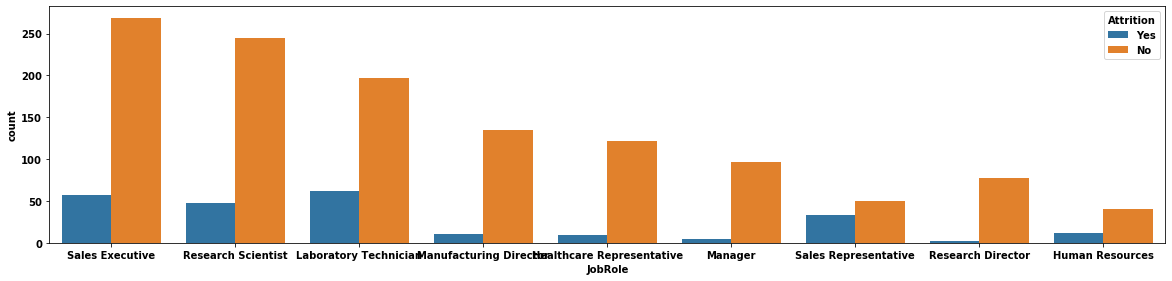

Plot for relationship between Attrition and MaritalStatus:


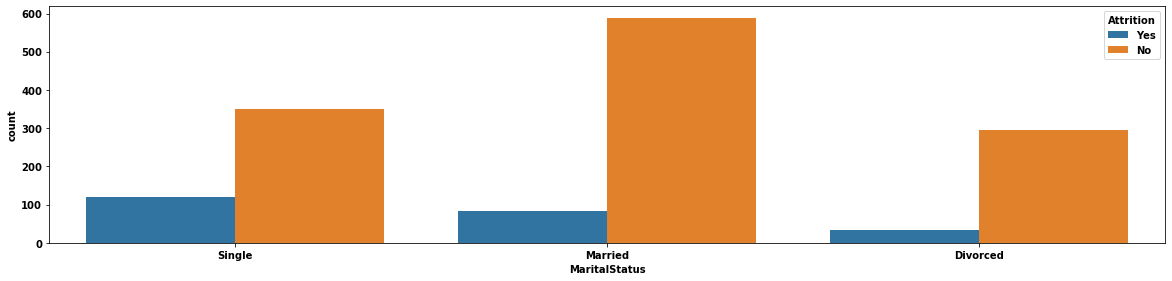

Plot for relationship between Attrition and JobInvolvement:


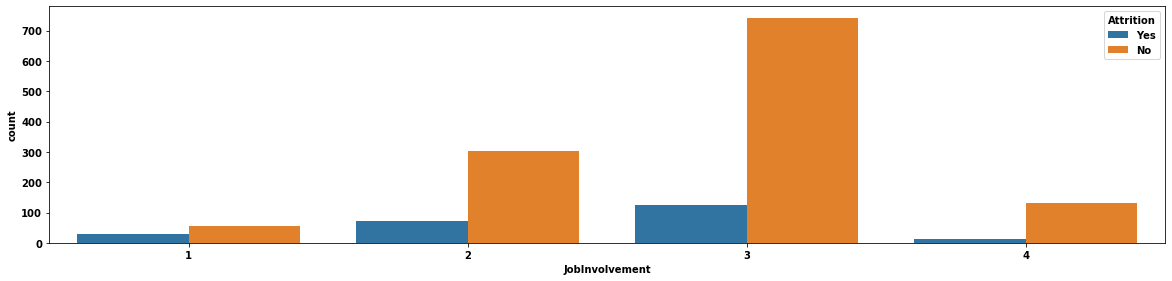

Plot for relationship between Attrition and JobLevel:


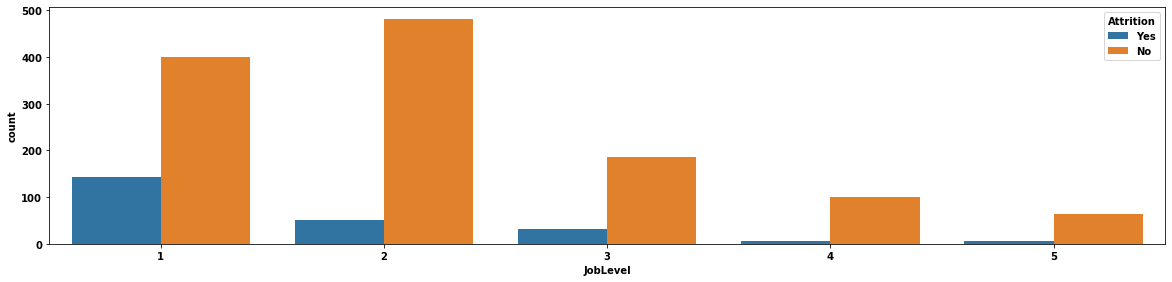

In [14]:
# Define the Columns of interest to be compared with the Attrition Column:
columns_of_interest = ['JobRole', 'MaritalStatus', 'JobInvolvement', 'JobLevel']

# Plot:
for idx, col in enumerate(columns_of_interest):
    plt.figure(figsize=[20, 20])
    print("Plot for relationship between Attrition and {}:".format(col))
    position_plot = 410 + (idx+1)
    plt.subplot(position_plot)
    sns.countplot(x=col, hue='Attrition', data=employee_data_df)
    plt.show()
    

### Observations:

For the 1st plot (Attrition and JobRole):
- There is a higher turnover rate for the job role of Sales Representatives.
- There are lower turnover rates for the job roles of Research Director, Managers, Manufacturing Directors etc.

For the 2nd plot (Attrition and MaritalStatus):
- Single employees were seen to leave the company more often than the others.

For the 3rd plot (Attrition and JobInvolvement):
- In terms of percentage of the employees that left, it seems that this happens with both JobInvolvement of 2 and 3.

For the 4th plot (Attrition and JobLevel):
- Lower job level employees (level 1) tend to leave more often compared with the rest. With more job experience, the employees tend to stay longer.


### 3.5 - Analysis on Continuous Variables:

To do this, the Kernel Density Estimation curve will be applied. The Kernel Density Estimation can be described as the process of estimating the probability density function of a random variable. It tries to infer the characteristics of a population that is based on a finite dataset.

The columns with continuous variables of interests are:
- DistanceFromHome
- YearsWithCurrManager
- TotalWorkingYears

Plot for relationship between Attrition and DistanceFromHome:


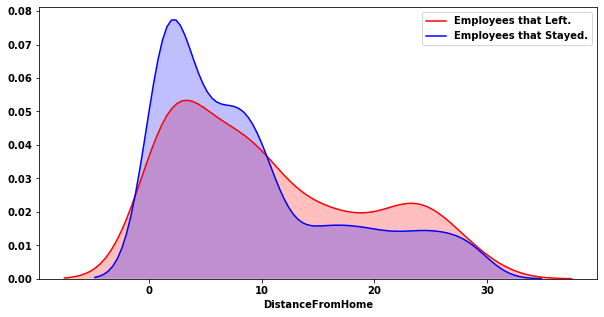

Plot for relationship between Attrition and YearsWithCurrManager:


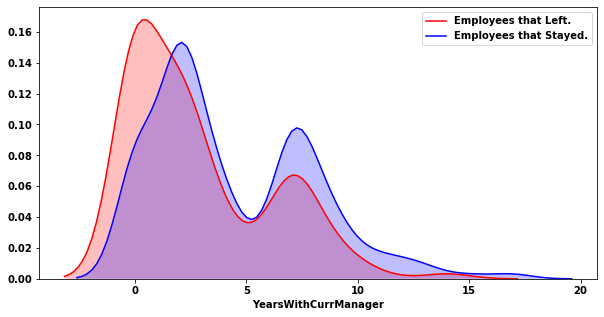

Plot for relationship between Attrition and TotalWorkingYears:


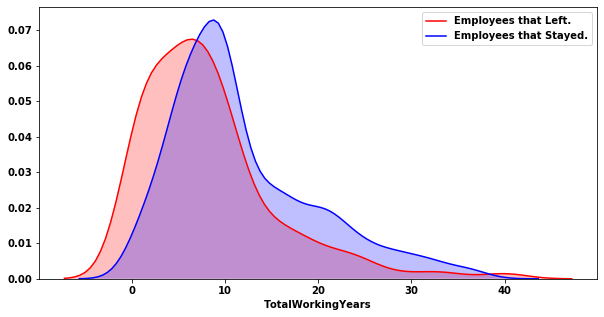

In [15]:
# Define the Continuous Columns:
columns_of_interest = ['DistanceFromHome', 'YearsWithCurrManager', 'TotalWorkingYears']

# Plots:
for col in columns_of_interest:
    print("Plot for relationship between Attrition and {}:".format(col))
    plt.figure(figsize=(10, 5))

    # Plot for DistanceFromHome vs. Employees that Left:
    sns.kdeplot(data=employee_left_df[col], label='Employees that Left.', shade=True, color='Red')

    # Plot for DistanceFromHome vs. Employees that Stayed:
    sns.kdeplot(data=employee_stayed_df[col], label='Employees that Stayed.', shade=True, color='Blue')

    # Label the X-axis:
    plt.xlabel(col)
    
    plt.show()

### Observation:

For the 1st Plot (Attrition and DistanceFromHome):
- Greater number of employees stayed with the company when they live closer to the work place.

For the 2nd Plot (Attrition and YearsWithCurrManager):
- In general, employees that have less time spent with the current manager tend to leave more often. 
- Employees also prefer to stay with the company as they have spent more than 5 years with their current manager.

For the 3rd Plot (Attrition and TotalWorkingYears):
- In general, employees tend to leave the company around the 6 years mark, while after 6 years, more employees stayed with the company. 

### 3.6 - Additional columns with continuous variables of interests:
- Gender vs MonthlyIncome
- JobRole vs. MonthlyIncome

Plot for relationship between MonthlyIncome and Gender:


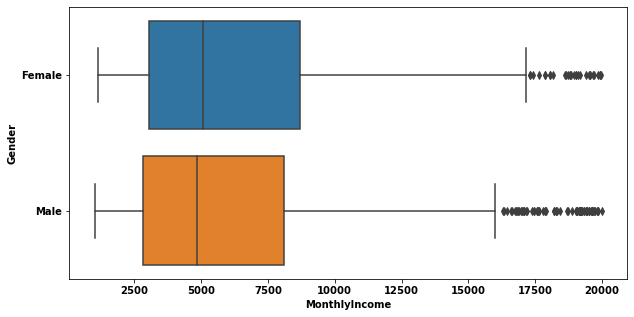

Plot for relationship between MonthlyIncome and JobRole:


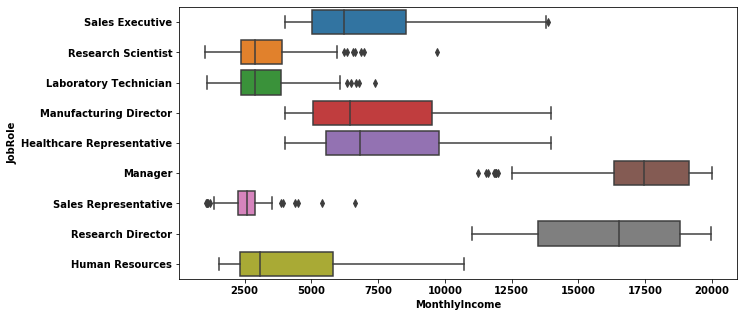

In [16]:
# Define the Continuous Columns:
columns_of_interest = ['Gender', 'JobRole']

# Plots:
for col in columns_of_interest:
    print("Plot for relationship between MonthlyIncome and {}:".format(col))
    plt.figure(figsize=(10, 5))

    # Plot:
    sns.boxplot(x='MonthlyIncome', y=col, data=employee_data_df)

    # Label the X-axis:
    plt.xlabel("MonthlyIncome")
    
    plt.show()

### Observation:

For the 1st Plot (MonthlyIncome and Gender):
- Female employees present with a higher mean pay compared to male employees.
- Overall, the payscale for both genders are relatively equal. 

For the 2nd Plot (MonthlyIncome and JobRole):
- Sales Executive, Manufacturing Director, Healthcare Representative can be seen to have a mean income of around USD 6,500.
- Reasearch Scientist, Laboratory Technician, Sales representative and Human Resources presents with the lowest income (USD USD 3,000) amongst the group.
- Managers and Research Directors are the two groups with the highest income at around USD 17,500 and USD 16,000 respectively.


## 4 - Data Cleaning:

In this section, the dataset will also go through the data cleaning process. Just to recap, this is where the data is prepared for analysis, by removing/modifying data (individual samples, rows or entire columns) that are incorrect, incomplete, irrelevent, duplicated or poorly formatted. This will ensure that the data which remains can be used to build a better model with greater predictive power. (In other words, to maximize a dataset’s accuracy without necessarily deleting information.)

The following diagram outlines the process for Data Cleaning:

<img src="Description Images/data_cleaning_cycle.jpg" width="550">

Image Ref -> https://www.iteratorshq.com/blog/data-cleaning-in-5-easy-steps/

The work done in this section will follow the steps outline above as much as possible, as different datasets will involve a varying degree of cleaning. The end goal of this section would be to define what will be needed so that a Pipeline can be designed to process the data for the modeling task, as well as exploring the characteristics of the dataset.



### 4.1 - Different Types of Data:

The following is a chart that defines the Types of Data to deal with:

<img src="Description Images/data-types-in-statistics.png" width="550">

Image Ref -> https://www.mymarketresearchmethods.com/data-types-in-statistics/

__Categorical values are split into Two types__: Nominal or Ordinal.

Nominal values -> Nominal scales are ttypically used for labeling data/variables that does not have any "quantitative" value. For example, gender, hair colour etc. Note that all of these are scales are mutually exclusive (non-overlapping) and consists of no numerical significance.

Ordinal values -> Ordinal scales do show that the ordering of these values have a significance, and that the differences between each value is not really known. For example, 4 is bettter than 3, and 3 is better than 2 and so on, but here you can't quantify how much better it is to each other. Another example, is the difference between “OK” and “Unhappy” the same as the difference between “Very Happy” and “Happy?”, it can be seen that it is not possible to tell the difference. Ordinal scales are measures of non-numeric concepts like satisfaction, happiness, discomfort, etc. Futher, the best way to determine the central tendency of a set of ordinal data values is use Mode or Median, but not the Mean.

__Numerical values are split into Two types__: Discrete or Continuous. \
Additionally, __Continuous variables__ are further split into two types: Intervals and Ratios.

Intervals -> Interval scales are numeric scales that shows the order and exact differences between its values. For example, the Celsis temperature have differences between each value and this difference is always the same. 
The central tendency can be measured by mode, median, or mean. The standard deviation can also be calculated.

Ratios -> Ratio scales are numeric scales that shows the order, its exact value between units and (unlike intervals) have an absolute zero. This allows for a wide range of descriptive and inferential statistics to be applied. These variables can be meaningfully added, subtracted, multiplied, divided (ratios). Central tendency can be measured by mode, median, or mean. The measures of dispersion, such as standard deviation and coefficient of variation can also be calculated from ratio scales. For example, these can be height and weight.

Source: https://www.mymarketresearchmethods.com/data-types-in-statistics/

#### Before diving into dealing with these values, let's first check the dataset for missing and irrelevant columns.

### 4.1.1 - Impute the Missing Values:

Let's first check if the dataset have any missing values.

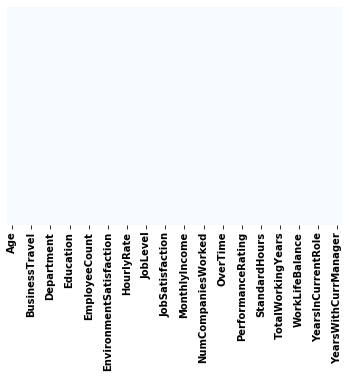

In [17]:
sns.heatmap(data=employee_data_df.isnull(), yticklabels=False, cbar=False, cmap = "Blues")

From the output plot, it shows that there are no missing data (Uniform blue colour).

### 4.1.2 - Split the dataset into Y (target variable) and X (features):

In [18]:
# Make a copy of the un-cleaned original raw dataset:
employee_data_df_original = employee_data_df.copy()

In [19]:
# Split the dataset into X (features) and y (target):

# For the target variable: Attrition.
y_employee_target = pd.DataFrame(employee_data_df['Attrition'])

# For the Feature variables: All of the rest.
employee_data_df = employee_data_df.drop(labels='Attrition', axis=1)

### 4.1.3 - Drop columns (features) that are not informative:

During the examination of the columns (features) of this dataset, the following columns were found to be uninformative:
- EmployeeCount (assigned a value of 1 for each employee)
- Over18 (Everyone is above 18 years of age)
- StandardHours (standard working hours of 80 for everyone)

These were found by simply going through the column headers in Excel (faster to perform), and setting up the filter feature, these columns presented with only a single value that does not provide any valuable information that can be used for modelling.

Therefore, let's drop these columns to simplify the dataset.

In [20]:
# Import the required library:
from sklearn.base import TransformerMixin

In [21]:
class CustomDropUnwantedColumns(TransformerMixin):
    """ This builds the CustomDropUnwantedColumns, that inherits the TransformerMixin class.
        It essentially removes the listed unwanted columns.
        The inheritance should have a .fit_transform method to call with .fit and .transform methods.
    
    """
    # Initialise the instance attributes, the columns:
    def __init__(self, col):
        self.col = col

    # Transform the dataset by dropping irrelevant columns:
    def transform(self, dataFrame):
        X = dataFrame.copy()
        
        X_dropped = X.drop(labels=columns_to_drop, axis=1)
        
        return X_dropped
    
    # Fit method, that follows the fit method from scikit-learn:
    def fit(self, *_):
        return self

In [22]:
# list the columns to drop:
columns_to_drop = ['EmployeeCount', 'Over18', 'StandardHours']

# Apply the custom encoder for Ordinal columns, instantiate:
cc_drop_columns = CustomDropUnwantedColumns(col=columns_to_drop)

# Fit and transform on the dataset:
employee_data_df_copy = cc_drop_columns.fit_transform(X=employee_data_df)
employee_data_df_copy

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,Male,...,3,4,0,17,3,2,9,6,0,8


As it can be seen, the column count has dropped from 35 columns (orignal: employee_data_df) to just 31 columns.

### 4.1.4 - Encoding the Categorical Features:

After taking a look at the dataset, it can be seen that it is split into two types of columns, categorical and numerical ones. Overall, categorical values will be encoded to numerical values so that the model can understand and use these information.

__Categorical Columns of Interests__:
1. BusinessTravel.
2. Department
3. EducationField
4. Gender
5. JobRole
6. MaritalStatus
7. OverTime

__Numerical Columns of Interests__:
After finding the list above, the rest of the dataset should be columns that consists of numerical values.

In [23]:
# List all the columns in the dataset:
employee_data_df_copy.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

#### Define a function to search for Categorical Values within a column:

In [24]:
def search_categorical_variables(dataset):
    ''' This function will search through the Dataset and determine which
        column is a categorical one or a numerical one.
    Parameters:
        - dataset, is the input dataset to search through.
    Returns:
        - returns lists_categorical_columns_found, lists_numerical_columns_found.
    '''
    lists_categorical_columns_found = []
    lists_numerical_columns_found = []

    for col in dataset.columns:
        for unique_row_value in dataset[col].unique():
            current_col_categorical = None

            if isinstance(unique_row_value, str):
                current_col_categorical = True
            else:
                ## Set as Numerical type:
                current_col_categorical = False

        # At the end of column check: Update list with the column name.
        if current_col_categorical:
            lists_categorical_columns_found.append(col)
        else:
            lists_numerical_columns_found.append(col)
    
    return lists_categorical_columns_found, lists_numerical_columns_found

#### Apply the above function:

In [25]:
lists_categorical_columns_found, lists_numerical_columns_found = search_categorical_variables(dataset=employee_data_df_copy)

# Shows the Categorical Columns found:
print('Categorical Columns found are:\t {}'.format(lists_categorical_columns_found))
print('\t')

# Shows the Numerical Columns found:
print('Numerical Columns found are:\t {}'.format(lists_numerical_columns_found))

Categorical Columns found are:	 ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
	
Numerical Columns found are:	 ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


From the output above, the list of Categorical Columns found matches the ones manually found from the excel spreadsheet (dataset). 

__Before continuing__, it is important to determine if the categorical columns found consists of Nominal or Ordinal values, as this will influence its conversion to numerical values.

#### Define a function to show its unique values:

This will take in the list of categorical columns found and print out its unque values.

In [26]:
def show_values_from_categorical_columns(dataset, list_of_columns):
    """ This function will print the unique values from the list of columns defined 
        for the dataset.
    Parameters:
        - dataset, is the input dataset (DataFrame)
        - list_of_columns, is the specified list of columns to search for.
    Returns:
        - won't return anything, but it will print the results.
    """
    for col in list_of_columns:
        unique_values = list( dataset[col].unique() )
        print("Column -> {} | Unique values are: {}".format(col, unique_values))
        print('\t')
    return

#### Apply the above function:

In [27]:
show_values_from_categorical_columns(dataset=employee_data_df_copy, 
                                     list_of_columns=lists_categorical_columns_found)

Column -> BusinessTravel | Unique values are: ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel']
	
Column -> Department | Unique values are: ['Sales', 'Research & Development', 'Human Resources']
	
Column -> EducationField | Unique values are: ['Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources']
	
Column -> Gender | Unique values are: ['Female', 'Male']
	
Column -> JobRole | Unique values are: ['Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', 'Human Resources']
	
Column -> MaritalStatus | Unique values are: ['Single', 'Married', 'Divorced']
	
Column -> OverTime | Unique values are: ['Yes', 'No']
	


Unfortunately, this part requires manual consideration and stating which columns are Nominal or Oridnal.

From the above, it seems like it can be split into the following:

__Nominal Columns__:
1. Department 
2. EducationField
3. Gender
4. JobRole
5. MaritalStatus
6. OverTime 

__Ordinal Columns__:
1. BusinessTravel 

Based on experience and some research, the above list was determined. 

#### Let's now list these columns to be used later on:


In [28]:
# Nominal Columns:
list_categorical_columns_nominal = ['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

# Ordinal Columns:
list_categorical_columns_ordinal = ['BusinessTravel']

### 4.1.5 - Encoding Data at the Nominal Level:

To do this, there are two options to transform the categorical data into dummy variables:
1. Pandas libray is able to find categorical values and dummy code them.
2. Create a custom transformer using dummy variables to work in a pipeline.

__Dummy Variables__: These are 0 or 1 values that indicates the presence of a category. In other words these are proxy variables for qualitative data.

__Dummy Variable Trap__: This is where independent variables are multicollinear or highly correlated, meaning that these variables can be predicted from each other. __To avoid this trap__, is to leave out the constant term or one of the dummy categories. The left out dummy variable can then become the base to be compared with for the rest of the variables.

#### Create a custom transformer using dummy variables to work in a pipeline:

In [29]:
class CustomCategoryEncoder_nominal(TransformerMixin):
    """ This builds the Custom Category Encoder for nominal columns, that inherits the TransformerMixin class.
        It will essentially dummify the values, this function is similar to one-hot-encoding (from sklearn).
        The inheritance should have a .fit_transform method to call with .fit and .transform methods.
    Parameters:
        - dataFrame, is the input Dataset (DataFrame)
        - cols, are the List of (Nominal) columns of interest for this transformation.
    Returns:
        - returns the Encoded Nominal Columns.
   
    """
    # Initialise one instance attribute, the columns
    def __init__(self, cols=None):
        self.cols = cols
    
    # Transform the dataset with the dummy variables:
    def transform(self, X):
        return pd.get_dummies(data=X,
                              columns= self.cols)
    
    # Fit method, that follows the fit method from scikit-learn:
    def fit(self, *_):
        return self

#### Apply the function above:

In [30]:
# Apply the custom encoder for Nominal columns, instantiate: similar to One-hot-encoding.
cc_nominal_encoder = CustomCategoryEncoder_nominal(cols= list_categorical_columns_nominal)

# Fit and transform on the dataset:
employee_data_df_copy = cc_nominal_encoder.fit_transform(X=employee_data_df_copy)
employee_data_df_copy

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,Travel_Rarely,1102,1,2,1,2,94,3,2,...,0,0,0,1,0,0,0,1,0,1
1,49,Travel_Frequently,279,8,1,2,3,61,2,2,...,0,0,1,0,0,0,1,0,1,0
2,37,Travel_Rarely,1373,2,2,4,4,92,2,1,...,0,0,0,0,0,0,0,1,0,1
3,33,Travel_Frequently,1392,3,4,5,4,56,3,1,...,0,0,1,0,0,0,1,0,0,1
4,27,Travel_Rarely,591,2,1,7,1,40,3,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,23,2,2061,3,41,4,2,...,0,0,0,0,0,0,1,0,1,0
1466,39,Travel_Rarely,613,6,1,2062,4,42,2,3,...,0,0,0,0,0,0,1,0,1,0
1467,27,Travel_Rarely,155,4,3,2064,2,87,4,2,...,1,0,0,0,0,0,1,0,0,1
1468,49,Travel_Frequently,1023,2,3,2065,4,63,2,2,...,0,0,0,1,0,0,1,0,1,0


### 4.1.6 - Encoding Data at the Ordinal Level: 

In [31]:
# Define the Custom category encoding Class:

class CustomCategoryEncoder_ordinal(TransformerMixin):
    """ This builds the Custom Category Encoder for ordinal columns, that inherits the TransformerMixin class.
        The inheritance should have a .fit_transform method to call with .fit and .transform methods.
    Parameters:
        - dataFrame, is the input Dataset (DataFrame)
        - print_cols, is an Optional Flag to print the columns of interest to encode.
        - cols, are the List of (Ordinal) columns of interest for this transformation.
        - ordering, is the ordering of the Ordinal Values.
    Returns:
        - returns the Encoded Ordinal Columns.
    """
    # Initialise the instance attributes, the columns and ordering:
    def __init__(self, print_cols=False, cols=None, ordering=None):
        self.cols = cols
        self.ordering = ordering
        self.print_cols = print_cols
         
    
    # Transform the dataset's ordinal values:
    def transform(self, dataFrame):
        X = dataFrame.copy()
        
        for col in self.cols:
        
            # Find the ordering of the Ordinal Values:
            if self.ordering is not None:
                ordering_to_encode_with = self.ordering
            else:
                ordering_to_encode_with = list( X[col].unique() )
            
            if self.print_cols == True:
                print("Column to Encode -> {} | Unique values are: {}".format(col, ordering_to_encode_with))
        
            # Encode:
            X[col] = X[col].map(lambda x: float(ordering_to_encode_with.index(x)))
        
        return X
    
    # Fit method, that follows the fit method from scikit-learn:
    def fit(self, *_):
        return self
    

#### Apply the function:

In [32]:
# Apply the custom encoder for Ordinal columns, instantiate:
cc_ordinal_encoder = CustomCategoryEncoder_ordinal(print_cols=True,
                                                   cols=list_categorical_columns_ordinal)

# Fit and transform on the dataset:
employee_data_df_copy = cc_ordinal_encoder.fit_transform(X=employee_data_df_copy)
employee_data_df_copy

Column to Encode -> BusinessTravel | Unique values are: ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel']


,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,0.0,1102,1,2,1,2,94,3,2,...,0,0,0,1,0,0,0,1,0,1
1,49,1.0,279,8,1,2,3,61,2,2,...,0,0,1,0,0,0,1,0,1,0
2,37,0.0,1373,2,2,4,4,92,2,1,...,0,0,0,0,0,0,0,1,0,1
3,33,1.0,1392,3,4,5,4,56,3,1,...,0,0,1,0,0,0,1,0,0,1
4,27,0.0,591,2,1,7,1,40,3,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1.0,884,23,2,2061,3,41,4,2,...,0,0,0,0,0,0,1,0,1,0
1466,39,0.0,613,6,1,2062,4,42,2,3,...,0,0,0,0,0,0,1,0,1,0
1467,27,0.0,155,4,3,2064,2,87,4,2,...,1,0,0,0,0,0,1,0,0,1
1468,49,1.0,1023,2,3,2065,4,63,2,2,...,0,0,0,1,0,0,1,0,1,0


### Notice: 

The changes performed on the nominal and ordinal values above have not been saved throughout, this is because, later on, a pipeline will be implemented to process the dataset in one go. The above only shows that the implemented classes of custom encoders are working as intended.


### 4.2 - Scaling the Dataset:

Scaling is an important part of preparing the dataset for the model, because Machine learning models learn a mapping from input variables to an output variable. The scale and distribution of the data drawn from the domain may be different for each variable within the dataset. The Input variables may have different units (e.g. feet, kilometers, and hours) meaning that the variables have different scales.

This difference in scales of the input variables will increase the model's difficulty in learning. For example, large input values (e.g. a spread of hundreds or thousands of units) can result in a model that learns large weight values. Larger weight values are often unstable, resulting in poor performance during learning and sensitivity to input values resulting in higher generalization error.

In [33]:
# Import the required Library:
from sklearn.preprocessing import MinMaxScaler

### 4.2.1 - Scale the Features only:

The function here will scale and convert it back to DataFrame. The typical MinMaxScaler() from sklearn outputs np.array.

#### NOTE: This step can be skipped, as sklearn models is not compatible when the column headers are present with the training (or testing) dataset. The training set will still be scaled with MinMaxScaler().

In [34]:
class scale_features_dataFrame(TransformerMixin):
    """ This builds the Custom Scaler for the dataset, that inherits the TransformerMixin class.
        The inheritance should have a .fit_transform method to call with .fit and .transform methods.
    Parameters:
        - dataFrame, is the input Dataset (DataFrame)
        - 
    Returns:
        - returns the Scaled DataFrame (rather than np.array).
    """
    # Initialise the instance attributes, the columns and ordering:
    def __init__(self):
        pass        
    
    # Transform the dataset's ordinal values:
    def transform(self, dataFrame):
        X = dataFrame.copy()
        scaler = MinMaxScaler()
        
        # Scale the data:
        X_array = scaler.fit_transform(X)
        
        # Convert back to DataFrame:
        X_df = pd.DataFrame(X_array, 
                            index=X.index, 
                            columns=X.columns)
               
        return X_df
    
    # Fit method, that follows the fit method from scikit-learn:
    def fit(self, *_):
        return self
    

#### Apply the function:

In [35]:
# Instantiate teh Scaler:
scaler = scale_features_dataFrame()

# Fit and Transform the data:
x_employee_features_copy = scaler.fit_transform(X=employee_data_df_copy)

# Inspect:
x_employee_features_copy

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.547619,0.0,0.715820,0.000000,0.25,0.000000,0.333333,0.914286,0.666667,0.25,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.738095,0.5,0.126700,0.250000,0.00,0.000484,0.666667,0.442857,0.333333,0.25,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.452381,0.0,0.909807,0.035714,0.25,0.001451,1.000000,0.885714,0.333333,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.357143,0.5,0.923407,0.071429,0.75,0.001935,1.000000,0.371429,0.666667,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.214286,0.0,0.350036,0.035714,0.00,0.002903,0.000000,0.142857,0.666667,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.5,0.559771,0.785714,0.25,0.996613,0.666667,0.157143,1.000000,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1466,0.500000,0.0,0.365784,0.178571,0.00,0.997097,1.000000,0.171429,0.333333,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1467,0.214286,0.0,0.037938,0.107143,0.50,0.998065,0.333333,0.814286,1.000000,0.25,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1468,0.738095,0.5,0.659270,0.035714,0.50,0.998549,1.000000,0.471429,0.333333,0.25,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


### 4.2.4 - Convert the Target Variables:

Convert them from "Yes" = 1 and "No" = 0.


In [36]:
# Take a copy of the y (target) variable:
y_employee_target_copy = y_employee_target

# Inspect:
y_employee_target_copy.head()

,Attrition
0,Yes
1,No
2,Yes
3,No
4,No


In [37]:
# Convert:
y_employee_target_copy = y_employee_target_copy['Attrition'].apply(lambda x: 1 if x == "Yes" else 0)

# Convert to Dataframe:
y_employee_target_copy = y_employee_target_copy.to_frame()

In [38]:
# Inspect:
y_employee_target_copy.head()

,Attrition
0,1
1,0
2,1
3,0
4,0


### 4.3 - Design the Pre-processing Pipeline:

Here, the pre-processing steps defined above will be set up in a pipeline to process and transform the dataset to be ready for the following stages suchh as Model training and Classification.

The sequence of the Pipeline:
1. Drop the unwanted columns.
2. One-hot encode the Nominal (categorical) values in the columns.
3. Encode the Ordinal (categorical) values in the columns.
4. Scale the features in the dataset.
5. Encode the Target variable to 0s and 1s:

These will be performed on the actual dataset (employee_data_df, not the copy of it).

In [39]:
# ==============================================================================
# 1. Drop the unwanted columns.
# ==============================================================================
# list the columns to drop:
columns_to_drop = ['EmployeeCount', 'Over18', 'StandardHours']

# Apply the custom encoder for Ordinal columns, instantiate:
cc_drop_columns = CustomDropUnwantedColumns(col=columns_to_drop)

# ==============================================================================
# 2. One-hot encode the Nominal (categorical) values in the columns:
# ==============================================================================
# Nominal Columns:
list_categorical_columns_nominal = ['Department', 'EducationField', 'Gender', 
                                    'JobRole', 'MaritalStatus', 'OverTime']

# Apply the custom encoder for Nominal columns, instantiate: similar to One-hot-encoding.
cc_nominal_encoder = CustomCategoryEncoder_nominal(cols= list_categorical_columns_nominal)

# ==============================================================================
# 3. Encode the Ordinal (categorical) values in the column:
# ==============================================================================
# Ordinal Columns:
list_categorical_columns_ordinal = ['BusinessTravel']

# Apply the custom encoder for Ordinal columns, instantiate:
cc_ordinal_encoder = CustomCategoryEncoder_ordinal(cols=list_categorical_columns_ordinal)

# ==============================================================================
# 4. Scale the features in the dataset:
# ==============================================================================
# scaler = scale_features_dataFrame()
scaler = MinMaxScaler()

# ==============================================================================
# 5. Encode the Target variable to 0s and 1s:
# ==============================================================================
# Done Above.

#### Transform the dataset with the pipeline:

In [40]:
# Import the required library:
from sklearn.pipeline import Pipeline

In [41]:
# Define the Pipeline Sequence:
pipe_preprocessing = Pipeline(steps=[("drop_columns", cc_drop_columns),
                                     ("nominal_encoder", cc_nominal_encoder), 
                                     ("ordinal_encoder", cc_ordinal_encoder), 
                                     ("scaler", scaler)]
                             )

# Fit the Pipeline to the Dataset:
pipe_preprocessing.fit(employee_data_df)

# Transform the Dataset:
employee_processed_df = pipe_preprocessing.transform(employee_data_df)
x_employee_features = employee_processed_df

# Inspect:
x_employee_features

array([[0.54761905, 0.        , 0.71581961, ..., 1.        , 0.        ,
        1.        ],
       [0.73809524, 0.5       , 0.12670007, ..., 0.        , 1.        ,
        0.        ],
       [0.45238095, 0.        , 0.90980673, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.21428571, 0.        , 0.03793844, ..., 0.        , 0.        ,
        1.        ],
       [0.73809524, 0.5       , 0.65926986, ..., 0.        , 1.        ,
        0.        ],
       [0.38095238, 0.        , 0.37652112, ..., 0.        , 1.        ,
        0.        ]])

Great! The implemented pipeline worked well and it can be seen that all the desired transformations have been done to the dataset. 

### 4.3.1 - Convert the Target Variables (on actual dataset):

In [42]:
# Convert:
y_employee_target = y_employee_target['Attrition'].apply(lambda x: 1 if x == "Yes" else 0)

# Convert to Numpy Array:
y_employee_target = y_employee_target.to_numpy()

In [43]:
# Inspect:
y_employee_target

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

From the above process, there should now be the following:
- x_employee_features
- y_employee_target

## 5 - Build and Train the Classifiers:

The classifiers to be employed for the the task of predicting whether the employee will leave or stay with the company are:
1. Logistic Regression.
2. Random Forest Classifier.
3. Artificial Neural Networks.

### Evaluate how-to:

Link: https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

"A system with high recall but low precision returns many results, but most of its predicted labels are incorrect when compared to the training labels. A system with high precision but low recall is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training labels. An ideal system with high precision and high recall will return many results, with all results labeled correctly." 

### 5.1 - Split the Dataset into Training and Testing Sets:


In [44]:
# Import the required Libraries:
from sklearn.model_selection import train_test_split

In [45]:
# Split the dataset:
X_train, X_test, y_train, y_test = train_test_split(x_employee_features, y_employee_target, test_size=0.25)

In [46]:
# Inspect the Shape:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1102, 50), (368, 50), (1102,), (368,))

### 5.2 - Logisttic Regression Classifier:

### 5.2.1 - Logistic Regression Model Description (intuition):

<img src="Description Images/Logistic_Regression.PNG" width="750">

Image Ref -> self-made

Sources:
- https://machinelearningmastery.com/what-is-maximum-likelihood-estimation-in-machine-learning/
- https://machinelearningmastery.com/logistic-regression-for-machine-learning/

In [47]:
# Import the required Libraries:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

In [48]:
# Model Name:
model_name = 'Logistic Regression Classifier'

# Instantiate the model:
logistic_model = LogisticRegression()

# Traing the model -> Fit the model to the dataset:
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [49]:
# Make predictions with Unseen data:
y_pred = logistic_model.predict(X_test)

# Inspect:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,

### 5.2.2 - Evaluate the Model: Logistic Regression Classifier.

In [50]:
# Import the required Library:
from sklearn.metrics import confusion_matrix, classification_report

#### Model Accuracy:

In [51]:
print("{}'s Accuracy: {}%".format( model_name , 
                                  round( (100 * accuracy_score(y_true=y_test, y_pred=y_pred)), ndigits=2) ))

Logistic Regression Classifier's Accuracy: 88.32%


#### Model F1-Score:

Considers, all the metrics, Accuracy, Precision and Recall.

In [52]:
print("{}'s F1-Score: {}%".format( model_name , 
                                  round( (100 * f1_score(y_true=y_test, y_pred=y_pred)), ndigits=2) ))

Logistic Regression Classifier's F1-Score: 48.19%


#### Model's Prediction Confusion Matrix:

Source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

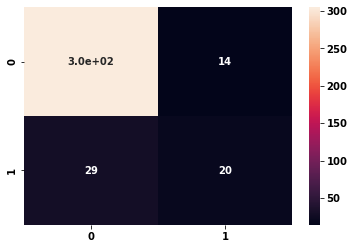

In [53]:
# Instantiate:
cm_logistic = confusion_matrix(y_true=y_test, y_pred=y_pred)

# Plot:
sns.heatmap(data=cm_logistic, annot=True)

#### Classification Report:


In [54]:
# Save the report:
logistic_reg_classifer_classification_report = classification_report(y_true=y_test, y_pred=y_pred)

print(logistic_reg_classifer_classification_report)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       319
           1       0.59      0.41      0.48        49

    accuracy                           0.88       368
   macro avg       0.75      0.68      0.71       368
weighted avg       0.87      0.88      0.87       368



### Observation:

The accuracy with this model was shown to be 87.23%, this is great but, the imbalance of the classes in the dataset have to be accounted for. When taking a look at the F1-score as it considers the precision and recall, the model's achieved a F1-score of 50.53%. Taking a look between precision and recall, it seems for the class label of 1 (Yes, the employee is leaving), the recall is low at 37% while the precision is high at 80%. This means that it is a system that will return very few results, but most of its predicted labels are correct when compared to the training labels.

Confusion matrix segments:
- TN at position 0,0
- FN at position 1,0
- TP at position 1,1
- FP at position 0,1

Taking a look at confusion matrix, it can be seen that it manages to classify 300 employees (TN) that stay and 24 of them (TP) will leave the company. It also missclasified 41 employees (FN) that are in actuallity leaving to be staying and 6 employees (FP) who are actually staying with the company to be leaving.


### 5.3 - Random Forest Classifier:

### 5.3.1 - Random Forest Model Description (intuition):

<img src="Description Images/Random_Forest.PNG" width="750">

Image Ref -> self-made

Sources:
- https://www.kdnuggets.com/2020/01/random-forest-powerful-ensemble-learning-algorithm.html
- https://towardsdatascience.com/understanding-random-forest-58381e0602d2


In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
# Model Name:
model_name = 'Random Forest Classifier'

# Instantiate the model:
randomForest_model = RandomForestClassifier()

# Traing the model -> Fit the model to the dataset:
randomForest_model.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
# Make predictions with Unseen data:
y_pred = randomForest_model.predict(X_test)

# Inspect:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

### 5.3.2 - Evaluate the Model: Logistic Regression Classifier.

#### Model Accuracy:

In [58]:
print("{}'s Accuracy: {}%".format( model_name , 
                                  round( (100 * accuracy_score(y_true=y_test, y_pred=y_pred)), ndigits=2) ))

Random Forest Classifier's Accuracy: 89.67%


#### Model F1-Score:

Considers, all the metrics, Accuracy, Precision and Recall.

In [59]:
print("{}'s F1-Score: {}%".format( model_name , 
                                  round( (100 * f1_score(y_true=y_test, y_pred=y_pred)), ndigits=2) ))

Random Forest Classifier's F1-Score: 42.42%


#### Model's Prediction Confusion Matrix:

Source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

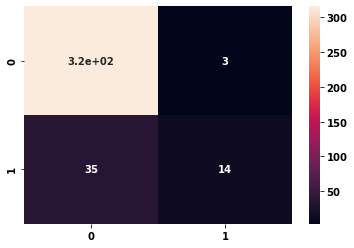

In [60]:
# Instantiate:
cm_randomForest = confusion_matrix(y_true=y_test, y_pred=y_pred)

# Plot:
sns.heatmap(data=cm_randomForest, annot=True)

#### Classification Report:

In [61]:
# Save the report:
randomForest_classifer_classification_report = classification_report(y_true=y_test, y_pred=y_pred)

print(randomForest_classifer_classification_report)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       319
           1       0.82      0.29      0.42        49

    accuracy                           0.90       368
   macro avg       0.86      0.64      0.68       368
weighted avg       0.89      0.90      0.87       368



### Observation:

The accuracy with the random forest model was shown to be 81.79%, this is better than the logistic regression model but again, the imbalance of the classes in the dataset have to be accounted for. When taking a look at the F1-score (as it considers the precision and recall), the model's performance drastically drops to 10.67%. This worst than the previous model. Further it can be seen that the precision metric is very low at 40%, which means that it will predict the class label 1 (Yes, employee leaving) 40% correct most of the time. This model should not be recommended.

Confusion matrix segments:
- TN at position 0,0
- FN at position 1,0
- TP at position 1,1
- FP at position 0,1

Taking a look at confusion matrix, it can be seen that it manages to classify 310 employees (TN) that stay and 13 of them (TP) will leave the company. It also missclasified 44 employees (FN) that are in actuallity leaving to be staying and 5 employees (FP) who are actually staying with the company to be leaving.


### 5.4 - Artificial Neural Networks:

### 5.4.1 - Artificial Neural Networks Description (intuition):

<img src="Description Images/Artificial_NeuralNetowks_1.PNG" width="750">


<img src="Description Images/Artificial_NeuralNetowks_2.PNG" width="750">

Image Ref -> 

Source:
- https://www.sciencedirect.com/science/article/pii/S2214317316300427
- https://www.kdnuggets.com/2019/10/introduction-artificial-neural-networks.html
- https://machinelearningmastery.com/when-to-use-mlp-cnn-and-rnn-neural-networks/

In [62]:
# Import the required Library: tf.keras API (using Sequential API)
import tensorflow as tf

Network Architecture:
1. Input layer with 500 nodes.
2. 1st Hidden Layer with 500 nodes.
3. 2nd Hidden Layer with 500 nodes.
4. Ouput Layer with 1 nodes for binary classification. 

In [63]:
# Build the model:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=500, activation='relu', input_shape=(50, )))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [64]:
# Show the model's summary:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               25500     
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 501       
Total params: 527,001
Trainable params: 527,001
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Compile the model:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

#### Train the model:

In [66]:
history_ANN = model.fit(X_train, y_train, epochs=100, batch_size=50)

Train on 1102 samples
Epoch 1/100
1102/1102 [==============================] - 1s 504us/sample - loss: 0.4694 - accuracy: 0.8212
Epoch 2/100
1102/1102 [==============================] - 0s 37us/sample - loss: 0.3689 - accuracy: 0.8403
Epoch 3/100
1102/1102 [==============================] - 0s 34us/sample - loss: 0.3429 - accuracy: 0.8584
Epoch 4/100
1102/1102 [==============================] - 0s 38us/sample - loss: 0.3238 - accuracy: 0.8730
Epoch 5/100
1102/1102 [==============================] - 0s 39us/sample - loss: 0.3119 - accuracy: 0.8793
Epoch 6/100
1102/1102 [==============================] - 0s 42us/sample - loss: 0.2701 - accuracy: 0.8966
Epoch 7/100
1102/1102 [==============================] - 0s 41us/sample - loss: 0.2520 - accuracy: 0.9065
Epoch 8/100
1102/1102 [==============================] - 0s 38us/sample - loss: 0.2108 - accuracy: 0.9229
Epoch 9/100
1102/1102 [==============================] - 0s 37us/sample - loss: 0.1882 - accuracy: 0.9356
Epoch 10/100
1102/1102 

#### Model Predictions:

In [67]:
y_pred = model.predict(X_test)

# Set threshold:
y_pred = (y_pred > 0.5)

# Inspect:
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [

#### Plot the model progress during training and Evaluate its performance: During Training Phase.

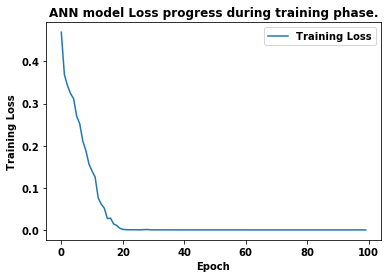

In [68]:
# Plot for Loss:
plt.plot(history_ANN.history['loss'])
plt.title("ANN model Loss progress during training phase.")
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

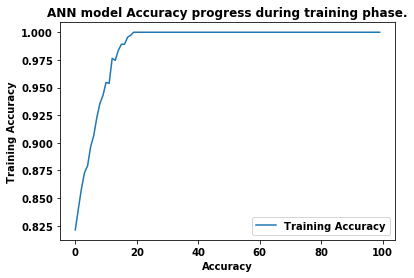

In [69]:
# Plot for Accuracy:
plt.plot(history_ANN.history['accuracy'])
plt.title("ANN model Accuracy progress during training phase.")
plt.xlabel('Accuracy')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'])

#### Confusion Matrix:

Source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

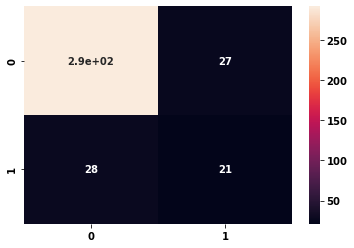

In [70]:
# Instantiate:
cm_ANN = confusion_matrix(y_true=y_test, y_pred=y_pred)

# Plot:
sns.heatmap(data=cm_ANN, annot=True)

#### Classification Report:

In [71]:
# Save the report:
ANN_classifer_classification_report = classification_report(y_true=y_test, y_pred=y_pred)

print(ANN_classifer_classification_report)

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       319
           1       0.44      0.43      0.43        49

    accuracy                           0.85       368
   macro avg       0.68      0.67      0.67       368
weighted avg       0.85      0.85      0.85       368



### Observation:

The accuracy with tthe ANN model managed to achieve 100% accuracy over longer periods of training, this is great but, the imbalance of the classes in the dataset have to be accounted for. When taking a look at the F1-score (as it considers the precision and recall), the model's performance drastically drops to 47%. This is only slightly better than Random Forest and is still worst than logistic regression.

Confusion matrix segments:
- TN at position 0,0
- FN at position 1,0
- TP at position 1,1
- FP at position 0,1

Taking a look at confusion matrix, it can be seen that it manages to classify 280 employees (TN) that stay and 20 of them (TP) will leave the company. It also missclasified 37 employees (FN) that are in actuallity leaving to be staying and 30 employees (FP) who are actually staying with the company to be leaving.

## 6 - Improving the Models:

As the better performing model was the __Logistic Regression__ model, it will be chosen here to be improved upon. There are also several options to consider to improve a model's performance when dealing with imbalance classes, such as:
1. Upsampling the class with less counts.
2. Downsampling the class with higher counts.
3. Use class-weights in accordance with the class distribution.

Here the (3) option will be considered. The procedure of weighting the data is used to compensate for the differences in sample and population. For example, in a population of 500,000 transactions there are 50 fraud transactions. In this case:

- Sample all 50 frauds transaction (100% of the fraud)
- 10% of the good transactions (10% of 500,000 is 50,000 good transactions)

Therefore, a weight of 1 for fraud transactions are assgined and a weight of 10 for good transactions. This is called the Weighted Maximum Likelihood method. The important takeaway is that the weighting is related to sampling proportions.

Source:
- https://machinelearningmastery.com/cost-sensitive-logistic-regression/
- https://chrisalbon.com/machine_learning/logistic_regression/handling_imbalanced_classes_in_logistic_regression/
- https://gking.harvard.edu/files/0s.pdf
- https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html

### 6.1 - Class-Weighted to account for the class imbalance:

Logistic regression does not support imbalanced classification directly.

Instead, the training algorithm used to fit the logistic regression model must be modified to take the skewed distribution into account. This can be achieved by specifying a class weighting configuration that is used to influence the amount that logistic regression coefficients are updated during training.

The weighting can penalize the model less for errors made on examples from the majority class and penalize the model more for errors made on examples from the minority class. The result is a version of logistic regression that performs better on imbalanced classification tasks, generally referred to as cost-sensitive or weighted logistic regression.

In [72]:
# Import the required library:
from sklearn.utils.class_weight import compute_class_weight

In [73]:
# Compute the heuristic class weighting:
weighting = compute_class_weight(class_weight='balanced', 
                                 classes=np.unique(y_employee_target), 
                                 y=y_employee_target)

print("The Weights computed for the Binary classes are -> {}".format(weighting))

The Weights computed for the Binary classes are -> [0.59610706 3.10126582]


The above shows that the larger class (staying) has now been assigned the weight of ~0.596, while the smaller class (leave) has now been assigned the weight of ~3.10. Next, let's experiment and see if this improves the model's performance.

### 6.2 - Run the Class-Weighted Logistic Regression Model:

In [74]:
# Model Name:
model_name = 'Logistic Regression Classifier_Weighted'

# Instantiate the model:
logistic_model_weighted = LogisticRegression(class_weight=weighting)

# Traing the model -> Fit the model to the dataset:
logistic_model_weighted.fit(X_train, y_train)

D:\anaconda3\envs\Py37Work\lib\site-packages\sklearn\linear_model\_logistic.py:679: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced":


LogisticRegression(class_weight=array([0.59610706, 3.10126582]))

In [75]:
# Make predictions with Unseen data:
y_pred = logistic_model_weighted.predict(X_test)

### 6.2.1 - Evaluate the Model: Logistic Regression Classifier.

#### Model Accuracy:

In [76]:
print("{}'s Accuracy: {}%".format( model_name , 
                                  round( (100 * accuracy_score(y_true=y_test, y_pred=y_pred)), ndigits=2) ))

Logistic Regression Classifier_Weighted's Accuracy: 88.32%


#### Model F1-Score:

Considers, all the metrics, Accuracy, Precision and Recall.

In [77]:
print("{}'s F1-Score: {}%".format( model_name , 
                                  round( (100 * f1_score(y_true=y_test, y_pred=y_pred)), ndigits=2) ))

Logistic Regression Classifier_Weighted's F1-Score: 48.19%


#### Model's Prediction Confusion Matrix:

Source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

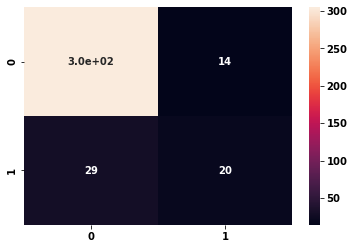

In [78]:
# Instantiate:
cm_logistic_weighted = confusion_matrix(y_true=y_test, y_pred=y_pred)

# Plot:
sns.heatmap(data=cm_logistic_weighted, annot=True)

#### Classification Report:


In [79]:
# Save the report:
logistic_reg_classifer_weighted_classification_report = classification_report(y_true=y_test, y_pred=y_pred)

print(logistic_reg_classifer_weighted_classification_report)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       319
           1       0.59      0.41      0.48        49

    accuracy                           0.88       368
   macro avg       0.75      0.68      0.71       368
weighted avg       0.87      0.88      0.87       368



### 6.2.3 - Compare with the non-weighted Logistic model:

In [80]:
print(logistic_reg_classifer_classification_report)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       319
           1       0.59      0.41      0.48        49

    accuracy                           0.88       368
   macro avg       0.75      0.68      0.71       368
weighted avg       0.87      0.88      0.87       368



### Observation:

Interestingly, it seems like thhere are no differences between the class-weighted model compared to the non-weighted model. Both seemed to have achieved the same results.

Another method to try is: __Grid Search Weighted Logistic Regression__.


### 6.3 - Grid Search Weighted Logistic Regression

In [81]:
# Import the required libraries:
from numpy import mean
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [82]:
# Define the Grid:
balance = [{0:100, 1:1}, {0:10, 1:1}, {0:1, 1:1}, {0:1, 1:10}, {0:1, 1:100}]\

# Save it as a dictionary to be used with sklearn models:
param_grid = dict(class_weight=balance)

#### Run Logistic Regression with Cross-validation:

In [83]:
# Define the evaluation procedure:
cross_valid = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)

# Fefine grid search
grid = GridSearchCV(estimator=logistic_model, 
                    param_grid=param_grid, 
                    n_jobs=-1, 
                    cv=cross_valid, 
                    scoring='f1')

# Training -> Execute the grid search:
grid_result = grid.fit(X_train, y_train)

#### Evaluate:

In [84]:
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.509848 using {'class_weight': {0: 1, 1: 1}}
0.026168 (0.046174) with: {'class_weight': {0: 100, 1: 1}}
0.156201 (0.111029) with: {'class_weight': {0: 10, 1: 1}}
0.509848 (0.101597) with: {'class_weight': {0: 1, 1: 1}}
0.467456 (0.038819) with: {'class_weight': {0: 1, 1: 10}}
0.335450 (0.015636) with: {'class_weight': {0: 1, 1: 100}}


### 6.3.1 - Get the Classification report:

In [85]:
# Model Name:
model_name = 'Logistic Regression Classifier_Weighted_GridSearch'

# Get the best weighting:
weighting = [grid_result.best_params_['class_weight'][0], grid_result.best_params_['class_weight'][1]]

# Instantiate the model:
logistic_model_weighted_GridSearch = LogisticRegression(class_weight=weighting)

# Traing the model -> Fit the model to the dataset:
logistic_model_weighted_GridSearch.fit(X_train, y_train)

LogisticRegression(class_weight=[1, 1])

In [86]:
# Make predictions with Unseen data:
y_pred = logistic_model_weighted_GridSearch.predict(X_test)

### 6.3.2 - Evaluate the Model:

#### Model Accuracy:

In [87]:
print("{}'s Accuracy: {}%".format( model_name , 
                                  round( (100 * accuracy_score(y_true=y_test, y_pred=y_pred)), ndigits=2) ))

Logistic Regression Classifier_Weighted_GridSearch's Accuracy: 88.32%


#### Model F1-Score:

Considers, all the metrics, Accuracy, Precision and Recall.

In [88]:
print("{}'s F1-Score: {}%".format( model_name , 
                                  round( (100 * f1_score(y_true=y_test, y_pred=y_pred)), ndigits=2) ))

Logistic Regression Classifier_Weighted_GridSearch's F1-Score: 48.19%


#### Model's Prediction Confusion Matrix:

Source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

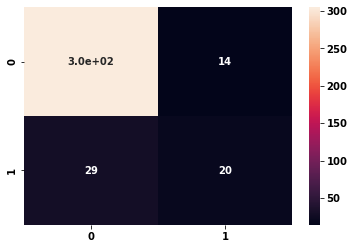

In [89]:
# Instantiate:
cm_logistic_weighted_GridSearch = confusion_matrix(y_true=y_test, y_pred=y_pred)

# Plot:
sns.heatmap(data=cm_logistic_weighted_GridSearch, annot=True)

#### Classification Report:


In [90]:
# Save the report:
logistic_reg_classifer_weighted_GridSearch_classification_report = classification_report(y_true=y_test, 
                                                                                         y_pred=y_pred)

print(logistic_reg_classifer_weighted_GridSearch_classification_report)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       319
           1       0.59      0.41      0.48        49

    accuracy                           0.88       368
   macro avg       0.75      0.68      0.71       368
weighted avg       0.87      0.88      0.87       368



### Observation:

By using the grid search method, the model performed better when the class_weight was set to {0: 1, 1: 1}. By taking this class_weight and inputting it into the model, it generated the classification report (seen above), and shows best accuracy can then be considered to 87.23% with a F1-score of 50.53%. This meant that some accuracy was sacrificed for a better F1-score, which makes it more robust to an imbalanced dataset.

## 7 - Perform Additional Feature Engineering:

This section will implement an additional (Feature enhancement) pipeline on-top of the cleaning pipeline. All of the above implementation utilises all of the features within the dataset, the problem here is that the dataset may naturally contain some noise that negatively impacts on the model's performance. Therefore various methods will be considered to remove the feautre columns are not helpful to the model.

Feature engineering techniques to consider and implement:
1. Statistical-Based selection method on the existing features.
    - Pearson Correlations.
    - Hypothesis Testing. (P-values).
2. Model-based selection method on the existing features.
    - Tree-based models.
3. Principcal Component Analysis to transform the features (Parametric assumption).
4. Restricted Boltzmann Machine (RBM) to create more features (non-parametric assumption).

The goal here is to examine whether the listed methods above can improve on the model's accuracy and F1-Score.

Before starting, define a function to train and evaluate the model.

In [91]:
def train_and_eval_Model(clf_model, X_train, y_train,
                         X_test, y_test, confusion_mat_labels=None, model_name=None):
    """ This function will train (fit) the specified model and print out the evaluation results.
    Parameters:
        - clf_model, is the input Model (class, e.g. LogisticRegression()).
        - X_train, is the input training set (features).
        - y_train, is the input training set (labels).
        - X_test, is the input testing set (features).
        - y_test, is the input testing set (labels).
        - confusion_mat_labels, is the Target Column to create labels for the confusion matrix (np.Array).
        - model_name, is the (String) model's name for tracking.
    Returns:
        - returns y_pred, model_confusion_matrix, model_classification_report
    Notes:
        - N/A
    """
    # Instantiate the model:
    model = clf_model
    
    # Traing the model -> Fit the model to the dataset:
    model.fit(X_train, y_train)
    
    # Make predictions with Unseen data:
    y_pred = model.predict(X_test)
    
    # Accuracy Metric:
    print("{}'s Accuracy: {}%".format( model_name , 
                                  round( (100 * accuracy_score(y_true=y_test, y_pred=y_pred)), ndigits=2) ))
    
    # F1-score Metric:
    print("{}'s F1-Score: {}%".format( model_name , 
                                  round( (100 * f1_score(y_true=y_test, y_pred=y_pred)), ndigits=2) ))
    
    print(" ")
    
    # Confusion Matrix Plot:
    print(" === Plotting Confusion Matrix === ")
    
    # output in this order: tn, fp, fn, tp 
    model_confusion_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
 
    ax= plt.subplot()
    sns.heatmap(data=model_confusion_matrix, annot=True)
    
    # labels, title and ticks
    ax.set_xlabel('Predicted labels'); 
    ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    
    true_pos_label = str(confusion_mat_labels.unique()[0])
    true_neg_label = str(confusion_mat_labels.unique()[1])
    false_pos_label = str(confusion_mat_labels.unique()[0])
    false_neg_label = str(confusion_mat_labels.unique()[1])
    
    ax.yaxis.set_ticklabels([true_neg_label, true_pos_label]);
    ax.xaxis.set_ticklabels([false_neg_label, false_pos_label]); 
    plt.show()
    print(" ")
    
    # Classification Report:
    # Save the report:
    model_classification_report = classification_report(y_true=y_test, y_pred=y_pred)
    print(model_classification_report)
    
    return y_pred, model_confusion_matrix, model_classification_report

In [92]:
def get_best_model_and_accuracy(model, params, X, y):
    """ This function will run the model with its set parameters, with the dataset.
        It does so by using sklearn's GridSearchCV.
    Parameters:
        - model, is the input model to be used.
        - params, is the Dict of parameters for the model
        - X, is the training dataset.
        - y, is the target variable.
    Returns:
        - returns the Best Accuracy, Best Parameters used, Average time to fit and Average time to Score.
    """
    # Define the GridSearchCV:
    grid = GridSearchCV(estimator=model, param_grid=params, error_score=0., n_jobs=-1)
    
    # Fit the model to the dataset:
    grid.fit(X, y)
    
    # Classical metric for performance:
    print("Best Accuracy: {:.3f}%".format( (100 * grid.best_score_) ))
    
    # Best parameters that caused the best accuracy
    print("Best Parameters: {}".format(grid.best_params_))
    
    # Average time it took a model to fit to the data (in seconds)
    print("Average Time to Fit (s): {}".format(round(grid.cv_results_['mean_fit_time'].mean(), 
                                                     ndigits=3)))
    
    # Average time it took a model to predict out of sample data (in seconds)
    # this metric gives us insight into how this model will perform in real-time analysis
    print("Average Time to Score (s): {}".format(round(grid.cv_results_['mean_score_time'].mean(), 
                                                       ndigits=3)))
    
    return grid

## 7.1 - Perform Statistical-Based selection techniques:

Statistical-based method will be implemented here because it can be used to interpret both Quantitive and Qualitative data types. It is also a Univariate approach, whereby it considers one feature at a time to single out for creating a better dataset for the ML model.

### 7.1.1 - Pearson Correlation:

Pearson Correlations coefficients measures the linear relationship between columns, it ranges between -1 and +1 where 0 means no correlation between the features. Correlations that are closer to -1 or +1 implies a strong linear relationship. This was also implemented earlier in this notebook. 

#### Determine the value of the "Threshold" to set:

Here, it is assumed that the more correlated the feature is to the target variable, the more useful this feature is. These Correlation coefficients will also be used to find the feature interactions and redundancies. Removing these redundancies also reduces the model overfitting issues.

In [93]:
# Combine the feature and target dataFrame into one:
y_employee_overall_copy = pd.concat([y_employee_target_copy, x_employee_features_copy], axis=1)

In [94]:
# Filter:
y_employee_overall_copy.corr()['Attrition']

Attrition                            1.000000
Age                                 -0.159205
BusinessTravel                      -0.000074
DailyRate                           -0.056652
DistanceFromHome                     0.077924
Education                           -0.031373
EmployeeNumber                      -0.010577
EnvironmentSatisfaction             -0.103369
HourlyRate                          -0.006846
JobInvolvement                      -0.130016
JobLevel                            -0.169105
JobSatisfaction                     -0.103481
MonthlyIncome                       -0.159840
MonthlyRate                          0.015170
NumCompaniesWorked                   0.043494
PercentSalaryHike                   -0.013478
PerformanceRating                    0.002889
RelationshipSatisfaction            -0.045872
StockOptionLevel                    -0.137145
TotalWorkingYears                   -0.171063
TrainingTimesLastYear               -0.059478
WorkLifeBalance                   

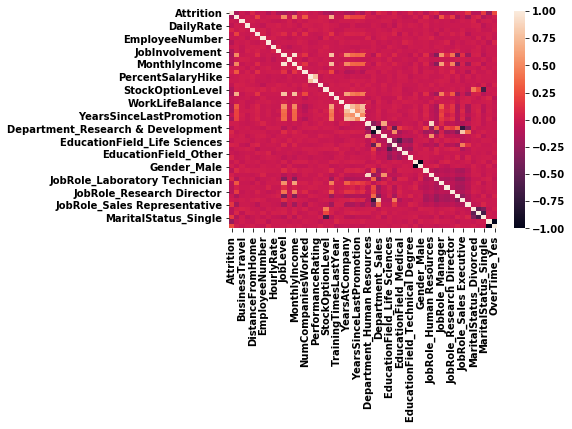

In [95]:
# Plot the heatmap:
sns.heatmap(data=y_employee_overall_copy.corr())

#### Filter out the features:

These should consist of features that are at least __-/+0.05 correlation__. This threshold value was determined from the output above. For example, setting the threshold to +/- 0.20 would remove almost all of the features and too low of a value will still include all of the columns (features). 

Another method to consider is to grid search the threshold value.

In [96]:
# Filter:
y_employee_overall_copy.corr()['Attrition'].abs()> .20

Attrition                             True
Age                                  False
BusinessTravel                       False
DailyRate                            False
DistanceFromHome                     False
Education                            False
EmployeeNumber                       False
EnvironmentSatisfaction              False
HourlyRate                           False
JobInvolvement                       False
JobLevel                             False
JobSatisfaction                      False
MonthlyIncome                        False
MonthlyRate                          False
NumCompaniesWorked                   False
PercentSalaryHike                    False
PerformanceRating                    False
RelationshipSatisfaction             False
StockOptionLevel                     False
TotalWorkingYears                    False
TrainingTimesLastYear                False
WorkLifeBalance                      False
YearsAtCompany                       False
YearsInCurr

In [97]:
# Filter:
y_employee_overall_copy.corr()['Attrition'].abs()> .05

Attrition                             True
Age                                   True
BusinessTravel                       False
DailyRate                             True
DistanceFromHome                      True
Education                            False
EmployeeNumber                       False
EnvironmentSatisfaction               True
HourlyRate                           False
JobInvolvement                        True
JobLevel                              True
JobSatisfaction                       True
MonthlyIncome                         True
MonthlyRate                          False
NumCompaniesWorked                   False
PercentSalaryHike                    False
PerformanceRating                    False
RelationshipSatisfaction             False
StockOptionLevel                      True
TotalWorkingYears                     True
TrainingTimesLastYear                 True
WorkLifeBalance                       True
YearsAtCompany                        True
YearsInCurr

#### Create a custom transformer to work in a pipeline: filtering out the non-correlated feature and keep the highly-correlelated features.

In [98]:
# Import the required Libraries:
from sklearn.base import TransformerMixin, BaseEstimator

In [99]:
class CustomStatsCorrSelector(TransformerMixin, BaseEstimator):
    """ This builds a custom Pearson Correlation feature selector that seleects the most highly correlated 
        features from the dataset. It inherits the attributes of the TransformerMixin and BaseEstimator classes.
    Parameters:
        - response, is the Target Variable of the dataset.
        - cols_to_keep, is the list columns of the highly correlated features.
        - threshold, is the assigned threshold value for correlation (e.g. -/+ 0.20 correlation).
    Return:
        - returns the transformed dataset.
    Note:
        - Made to be compatible with scikit-learn's fit and transform methods.
    """
    def __init__(self, response, cols_to_keep=[], threshold=None):
        # Store the response variable (Series):
        self.response = response
        
        # Store the threshold:
        self.threshold = threshold
        
        # Feature Column names to Keep:
        self.cols_to_keep = cols_to_keep
        
    def transform(self, dataFrame):
        # Selects the columns to keep from the dataset:
        return dataFrame[self.cols_to_keep]
    
    def fit(self, dataFrame, *_):
        # Create a new DataFrame by concatenating the Feature + Target(response):
        df = pd.concat([dataFrame, self.response], axis=1)
        
        # Select and store the correlations (features) that meet the threshold requirement:
        self.cols_to_keep = df.columns[ df.corr()[df.columns[-1]].abs() > self.threshold ]
        
        # Remove the Target Variable and Keep ony the feature columns:
        self.cols_to_keep = [feature_cols for feature_cols in self.cols_to_keep if feature_cols in dataFrame.columns]
        
        return self

### Apply the method above:

In [100]:
# Define the number of  original columns:
len(x_employee_features_copy.columns)

50

In [101]:
# Make a Copy of the Target Variable: Target must be pd.DataFrame
y_employee_target_copy = pd.DataFrame(data=y_employee_target_copy.copy())

# Instantiate the Transformer:
cscs = CustomStatsCorrSelector(response=y_employee_target_copy, threshold=0.05)

# Fit it to the dataset:
cscs.fit(x_employee_features_copy)

# Inspect which columns remained:
cscs.cols_to_keep

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Marketing',
 'EducationField_Technical Degree',
 'JobRole_Healthcare Representative',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Sales Representative',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'OverTime_No',
 'OverTime_Yes']

In [102]:
# Transform the dataset:
cscs.transform(x_employee_features_copy).head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,StockOptionLevel,TotalWorkingYears,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.547619,0.715820,0.000000,0.333333,0.666667,0.25,1.000000,0.262454,0.000000,0.200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.738095,0.126700,0.250000,0.666667,0.333333,0.25,0.333333,0.217009,0.333333,0.250,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.452381,0.909807,0.035714,1.000000,0.333333,0.00,0.666667,0.056925,0.000000,0.175,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.357143,0.923407,0.071429,1.000000,0.666667,0.00,0.666667,0.100053,0.000000,0.200,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.214286,0.350036,0.035714,0.000000,0.666667,0.00,0.333333,0.129489,0.333333,0.150,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


The number of columns have been reduced from 50 to 30.

## Sanity Check:

Let's make sure that the Feature Engineering performed so far have actually improved on the model's performance. The check for sanity, what happens when all the remaining columns are utilised __except__ the ones from the two statistical techniques. Would this make the model perform worst?

In [103]:
# Instantiate the Correlation Transformer:
cscs = CustomStatsCorrSelector(response=y_employee_target_copy, threshold=0.05)

# Define the Pipeline Sequence: WITHOUT the SCALER
pipe_preprocessing = Pipeline(steps=[("drop_columns", cc_drop_columns),
                                     ("nominal_encoder", cc_nominal_encoder), 
                                     ("ordinal_encoder", cc_ordinal_encoder),
                                     ("feature_eng_corr", cscs),
                                     ("scaler", scaler)]
                                   )

# Fit the Pipeline to the Dataset:
pipe_preprocessing.fit(employee_data_df)

# Transform the Dataset:
employee_processed_df = pipe_preprocessing.transform(employee_data_df)
x_employee_features = employee_processed_df

# Grab the worst features:
x_employee_features_worstFeatures = x_employee_features_copy.drop(cscs.cols_to_keep, axis=1)

# Split the WORST FEATURES dataset:
X_train, X_test, y_train, y_test = train_test_split(x_employee_features_worstFeatures, 
                                                    y_employee_target, 
                                                    test_size=0.25)


Logistic Regression Classifier_Weighted_WorstFeatures's Accuracy: 87.77%
Logistic Regression Classifier_Weighted_WorstFeatures's F1-Score: 0.0%
 
 === Plotting Confusion Matrix === 


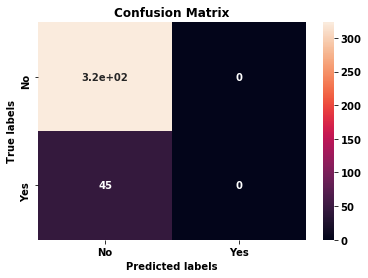

 
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       323
           1       0.00      0.00      0.00        45

    accuracy                           0.88       368
   macro avg       0.44      0.50      0.47       368
weighted avg       0.77      0.88      0.82       368



D:\anaconda3\envs\Py37Work\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [104]:
# Get the best weighting:
weighting = [grid_result.best_params_['class_weight'][0], grid_result.best_params_['class_weight'][1]]


y_pred, model_confusion_matrix, model_classification_report = train_and_eval_Model(clf_model=LogisticRegression(class_weight=weighting),
                                                                                   X_train=X_train,
                                                                                   y_train=y_train,
                                                                                   X_test=X_test,
                                                                                   y_test=y_test,
                                                                                   confusion_mat_labels=employee_data_df_original['Attrition'],
                                                                                   model_name='Logistic Regression Classifier_Weighted_WorstFeatures')

There it is, The model does perform __worst__ (lower accuracy) when the remaining features were selected. It can be seen that the model was not able to correctly identify the employees that will leave (Yes, Attrition).

#### Next, let's examine how well the model will perform will the highly correlated features.



In [105]:
# Instantiate the Correlation Transformer:
cscs = CustomStatsCorrSelector(response=y_employee_target_copy, threshold=0.05)

# Define the Pipeline Sequence: 
pipe_preprocessing_featureEng = Pipeline(steps=[("drop_columns", cc_drop_columns),
                                                ("nominal_encoder", cc_nominal_encoder), 
                                                ("ordinal_encoder", cc_ordinal_encoder),
                                                ("feature_eng_corr", cscs),
                                                ('scaler', scaler)]
                                        )

# Fit the Pipeline to the Dataset:
pipe_preprocessing_featureEng.fit(employee_data_df)

# Transform the Dataset:
employee_processed_df = pipe_preprocessing_featureEng.transform(employee_data_df)
x_employee_features = employee_processed_df

# Split the dataset:
X_train, X_test, y_train, y_test = train_test_split(x_employee_features, 
                                                    y_employee_target, 
                                                    test_size=0.25)


#### Train and evaluate the model:

Logistic Regression Classifier_Weighted_CorrFeatures's Accuracy: 83.97%
Logistic Regression Classifier_Weighted_CorrFeatures's F1-Score: 28.92%
 
 === Plotting Confusion Matrix === 


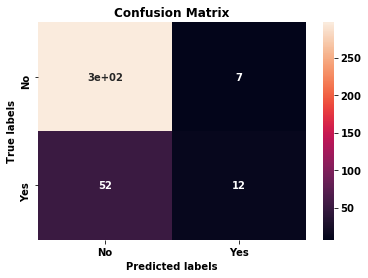

 
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       304
           1       0.63      0.19      0.29        64

    accuracy                           0.84       368
   macro avg       0.74      0.58      0.60       368
weighted avg       0.81      0.84      0.80       368



In [106]:
# Get the best weighting:
weighting = [grid_result.best_params_['class_weight'][0], grid_result.best_params_['class_weight'][1]]


y_pred, model_confusion_matrix, model_classification_report = train_and_eval_Model(clf_model=LogisticRegression(class_weight=weighting),
                                                                                   X_train=X_train,
                                                                                   y_train=y_train,
                                                                                   X_test=X_test,
                                                                                   y_test=y_test,
                                                                                   confusion_mat_labels=employee_data_df_original['Attrition'],
                                                                                   model_name='Logistic Regression Classifier_Weighted_CorrFeatures')

### Compare with the previous model:

Model: Logistic Regression Classifier_Weighted_GridSearch's Accuracy: 85.87%

In [107]:
print(logistic_reg_classifer_weighted_GridSearch_classification_report)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       319
           1       0.59      0.41      0.48        49

    accuracy                           0.88       368
   macro avg       0.75      0.68      0.71       368
weighted avg       0.87      0.88      0.87       368



Comparing this model (with Pearson Correlation to select the features) to the previous model (weighted LogReg + Gridsearched), this model was found to be less accurate by a slight amount (at 87.77% vs. ~88%). This could mean that there are other columns that provides better prediction power that was removed in this process.



### 7.1.2 - Hypothesis Testing (P-values):

Here, the best features from the dataset will be selected through hypothesis testing requiring the computation of P-values. The test can be used to determine if a certain condition can be applied to an entire population, given a data sample. The results is used to reject the hypothesis or the null hypothesis. 

Defined Hypothesis for this dataset:
True or False, if the feature in question has relevance to the target variable. Meaning that this is tested on every feature in the dataset and to determine if the feature holds significance to the prediction of the target variable.

This can be done directly with scikit-learn modules without the implementation of a custom class.

Notes:

- f_classif allows for negative values. Not all do, like chi2.
- chi2 is a very common classification criteria but only allows for positive values.
- regression has its own statistical tests.

#### P-value:

P-values are in the decimal format and ranges betwen 0 and 1, it represents the probability that the data given occurred by chance under the hypothesis test. Meaning that, __the lower the P-value, the better chance the null hypothesis can be rejected__.

In the case here, the smaller the p-value, the more relevance that the feature has towards the target variable and therefore it should be kept.



In [108]:
# Import the required Libraries:

# Selects the features according to the k highest scores of a given scoring function:
from sklearn.feature_selection import SelectKBest

# Models the statistical test: ANOVA
from sklearn.feature_selection import f_classif

#### Ranking of the P-values:

Keep only the best 10 features according to the P-values of the ANOVA test. Where here, k=10, this is currently defined like so as a test. The actual __best__ value will be determined through the GridSearch method.

In [109]:
# Instantiate the Correlation Selector that Performs the ANOVA test: Find the K-best features.
k_best_features = SelectKBest(score_func=f_classif, k=10)

# Fit and Transform on the dataset:
k_best_features.fit_transform(x_employee_features_copy, y_employee_target_copy)


D:\anaconda3\envs\Py37Work\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([[0.54761905, 0.25      , 0.26245392, ..., 1.        , 0.        ,
        1.        ],
       [0.73809524, 0.25      , 0.21700895, ..., 0.        , 1.        ,
        0.        ],
       [0.45238095, 0.        , 0.0569247 , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.21428571, 0.25      , 0.27030016, ..., 0.        , 0.        ,
        1.        ],
       [0.73809524, 0.25      , 0.23070037, ..., 0.        , 1.        ,
        0.        ],
       [0.38095238, 0.25      , 0.1787783 , ..., 0.        , 1.        ,
        0.        ]])

In [110]:
# Grab the p-value column:
k_best_features.pvalues_

# Place in DataFrame:
p_values = pd.DataFrame(data={'column': x_employee_features_copy.columns, 
                              'p_value': k_best_features.pvalues_}).sort_values('p_value')

# Inspect:
p_values.head()

,column,p_value
48,OverTime_No,1.009254e-21
49,OverTime_Yes,1.009254e-21
47,MaritalStatus_Single,1.265702e-11
18,TotalWorkingYears,4.061878e-11
9,JobLevel,6.795385e-11


In [111]:
# Select and show all of the features with a low p-value: < 0.05
p_values[p_values['p_value'] < .05]

,column,p_value
48,OverTime_No,1.009254e-21
49,OverTime_Yes,1.009254e-21
47,MaritalStatus_Single,1.265702e-11
18,TotalWorkingYears,4.061878e-11
9,JobLevel,6.795385e-11
22,YearsInCurrentRole,6.003186e-10
11,MonthlyIncome,7.147364e-10
0,Age,8.356308e-10
44,JobRole_Sales Representative,1.352257e-09
24,YearsWithCurrManager,1.736987e-09


In [112]:
# Find the number of columns with p-values < 0.05:
len(p_values[p_values['p_value'] < .05])

30

The total columns from the raw dataset were reduced to just 30 columns, where this is similar to the higly-correlated method of finding features. It can be seen that the Selector has chosen the columns seen above to be the most important ones. As the P-values are very small, where they are all below 0.05, which means these features are all significant.

#### The Hypothesis-Testing base method performance:



In [113]:
p_values.column[p_values['p_value'] < .05].to_list()

['OverTime_No',
 'OverTime_Yes',
 'MaritalStatus_Single',
 'TotalWorkingYears',
 'JobLevel',
 'YearsInCurrentRole',
 'MonthlyIncome',
 'Age',
 'JobRole_Sales Representative',
 'YearsWithCurrManager',
 'StockOptionLevel',
 'YearsAtCompany',
 'JobInvolvement',
 'JobSatisfaction',
 'EnvironmentSatisfaction',
 'JobRole_Laboratory Technician',
 'MaritalStatus_Married',
 'JobRole_Research Director',
 'MaritalStatus_Divorced',
 'Department_Research & Development',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'Department_Sales',
 'JobRole_Healthcare Representative',
 'DistanceFromHome',
 'EducationField_Technical Degree',
 'WorkLifeBalance',
 'TrainingTimesLastYear',
 'DailyRate',
 'EducationField_Marketing']

In [114]:
# Instantiate the Selector:
k_best_features = SelectKBest(score_func=f_classif, k=10)

# Define the Pipeline Sequence: for preprocessing
pipe_preprocessing_featureEng = Pipeline(steps=[("drop_columns", cc_drop_columns),
                                     ("nominal_encoder", cc_nominal_encoder), 
                                     ("ordinal_encoder", cc_ordinal_encoder),
                                     ('scaler', scaler),
                                     ('k_best', k_best_features)]
                             )

# Fit the Pipeline to the Dataset: for preprocessing
pipe_preprocessing_featureEng.fit(employee_data_df, y_employee_target_copy)

# Transform the Dataset: for preprocessing
employee_processed_df = pipe_preprocessing_featureEng.transform(employee_data_df)
x_employee_features = employee_processed_df

# Split the dataset:
X_train, X_test, y_train, y_test = train_test_split(x_employee_features, 
                                                    y_employee_target, 
                                                    test_size=0.25)


D:\anaconda3\envs\Py37Work\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


#### Train and evaluate the model:

Logistic Regression Classifier_Weighted_KBestFeatures's Accuracy: 85.05%
Logistic Regression Classifier_Weighted_KBestFeatures's F1-Score: 12.7%
 
 === Plotting Confusion Matrix === 


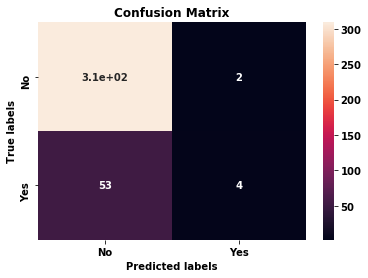

 
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       311
           1       0.67      0.07      0.13        57

    accuracy                           0.85       368
   macro avg       0.76      0.53      0.52       368
weighted avg       0.82      0.85      0.80       368



In [115]:
# Get the best weighting:
weighting = [grid_result.best_params_['class_weight'][0], 
             grid_result.best_params_['class_weight'][1]]


y_pred, model_confusion_matrix, model_classification_report = train_and_eval_Model(clf_model=LogisticRegression(class_weight=weighting),
                                                                                   X_train=X_train,
                                                                                   y_train=y_train,
                                                                                   X_test=X_test,
                                                                                   y_test=y_test,
                                                                                   confusion_mat_labels=employee_data_df_original['Attrition'],
                                                                                   model_name='Logistic Regression Classifier_Weighted_KBestFeatures')

### Observation:

Comparing this model (with features selected from p-values) to the previous model (weighted LogReg + Gridsearched), this model was found to be slightly more accurate (at 86.68% vs. ~85.87%). This means that the selected features of 30 columns provided the model with good predictive power and it was able to remove some of the noise.

### Compare with the previous model:

Model: Logistic Regression Classifier_Weighted_GridSearch's Accuracy: 85.87%

In [116]:
print(logistic_reg_classifer_weighted_GridSearch_classification_report)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       319
           1       0.59      0.41      0.48        49

    accuracy                           0.88       368
   macro avg       0.75      0.68      0.71       368
weighted avg       0.87      0.88      0.87       368



#### This will be implemented in a Pipeline later on.

## 7.2 - Model-based selection method on the existing features: Tree-based models.

Model-based selection is a better approach when the dataset is large, this improves on the speed limitations of the Statistical-based Univariate methods seen in the above section.

### 7.2.1 - Tree-based models to find the most important features:

This can be used to check with the output columns of the Statistical methods.

In [117]:
# Import the required libraries:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

In [118]:
# Instantiate the Decision tree classifier:
decision_tree = DecisionTreeClassifier()

# fit it to the dataset:
decision_tree.fit(x_employee_features_copy, y_employee_target_copy)

# Place in DataFrame:
importances_tree = pd.DataFrame({'importance': decision_tree.feature_importances_, 
                                 'feature':x_employee_features_copy.columns}).sort_values('importance', ascending=False)

# Inspect:
importances_tree.head()

,importance,feature
11,0.128871,MonthlyIncome
5,0.073881,EmployeeNumber
7,0.064720,HourlyRate
48,0.060574,OverTime_No
0,0.054940,Age


Interestingly, the Decision Tree Classifier has output several different feature columns to the Hypothesis-testing method. 

#### The Tree-based model base method performance:

In [119]:
# Instantiate the Selector:
select_from_model = SelectFromModel(estimator=DecisionTreeClassifier(), threshold=0.05)

# Define the Pipeline Sequence: for preprocessing
pipe_preprocessing_featureEng = Pipeline(steps=[("drop_columns", cc_drop_columns),
                                                ("nominal_encoder", cc_nominal_encoder), 
                                                ("ordinal_encoder", cc_ordinal_encoder),
                                                ('scaler', scaler),
                                                ('select_feat_treeModel', select_from_model)]
                                        )

# Fit the Pipeline to the Dataset: for preprocessing
pipe_preprocessing_featureEng.fit(employee_data_df, y_employee_target_copy)

# Transform the Dataset: for preprocessing
employee_processed_df = pipe_preprocessing_featureEng.transform(employee_data_df)
x_employee_features = employee_processed_df

# Split the dataset:
X_train, X_test, y_train, y_test = train_test_split(x_employee_features, 
                                                    y_employee_target, 
                                                    test_size=0.25)


#### Train and evaluate the model:

Logistic Regression Classifier_Weighted_KBestFeatures's Accuracy: 84.51%
Logistic Regression Classifier_Weighted_KBestFeatures's F1-Score: 3.39%
 
 === Plotting Confusion Matrix === 


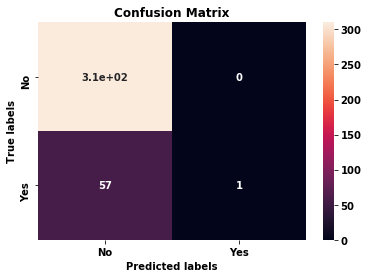

 
              precision    recall  f1-score   support

           0       0.84      1.00      0.92       310
           1       1.00      0.02      0.03        58

    accuracy                           0.85       368
   macro avg       0.92      0.51      0.47       368
weighted avg       0.87      0.85      0.78       368



In [120]:
# Get the best weighting:
weighting = [grid_result.best_params_['class_weight'][0], 
             grid_result.best_params_['class_weight'][1]]


y_pred, model_confusion_matrix, model_classification_report = train_and_eval_Model(clf_model=LogisticRegression(class_weight=weighting),
                                                                                   X_train=X_train,
                                                                                   y_train=y_train,
                                                                                   X_test=X_test,
                                                                                   y_test=y_test,
                                                                                   confusion_mat_labels=employee_data_df_original['Attrition'],
                                                                                   model_name='Logistic Regression Classifier_Weighted_KBestFeatures')

### Observation:

It seems like this feature selection method with Decision Trees did not yield a bette set of features for the model.

#### The Tree-based method will NOT be implemented into the Pipeline later on.

## 7.3 - Principcal Component Analysis to transform the features (Parametric assumption).

PCA is a Feature Transformation technique, where it takes several correlated features from the dataset and projects them onto a coordinate (axis) space that has fewer correlated features. These new uncorrelated columns (features) are called Principal Components. Principal Components serves as an alternative coordinate system to the original feature space, whhere it requires fewer features that is able to capture most of the variance as possible.

#### Note: Fit PCA after scaling the data.

In [121]:
# Import the required Libraries:
from sklearn.decomposition import PCA

#### Scree plot:

Show the cummulative explained variance of the PCA components. This can be used to determined the estimated number of components to be used for PCA for preliminary tests with the model.

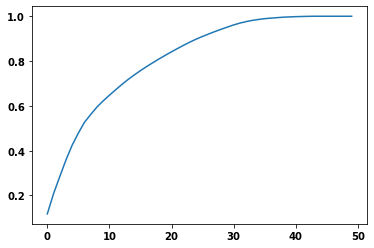

In [122]:
# Define the Pipeline Sequence: 
pipe_preprocessing_featureEng = Pipeline(steps=[("drop_columns", cc_drop_columns),
                                                ("nominal_encoder", cc_nominal_encoder), 
                                                ("ordinal_encoder", cc_ordinal_encoder),
                                                ('scaler', scaler)]
                                        )

# Fit the Pipeline to the Dataset: for preprocessing
pipe_preprocessing_featureEng.fit(employee_data_df, y_employee_target_copy)

# Transform the Dataset: for preprocessing
employee_processed_df = pipe_preprocessing_featureEng.transform(employee_data_df)
x_employee_features = employee_processed_df

# Extract all of the components: 
pca_full = PCA(n_components=x_employee_features.shape[1])

pca_full.fit(x_employee_features)

# Plot:
plt.plot( np.cumsum(pca_full.explained_variance_ratio_) )

From the above, it seems like about 30 components is able to explain about 90% of the variance in the dataset. This value (30 components) falls in line with the previous findings.

#### Experiment with Less PCA components to test the model's performance.

Taking only 5 components.

In [123]:
# Instantiate the Selector:
pca = PCA(n_components=5)

# Define the Pipeline Sequence: for preprocessing
pipe_preprocessing_featureEng = Pipeline(steps=[("drop_columns", cc_drop_columns),
                                                ("nominal_encoder", cc_nominal_encoder), 
                                                ("ordinal_encoder", cc_ordinal_encoder),
                                                ('scaler', scaler),
                                                ('PCA', pca)]
                                        )

# Fit the Pipeline to the Dataset: for preprocessing
pipe_preprocessing_featureEng.fit(employee_data_df, y_employee_target_copy)

# Transform the Dataset: for preprocessing
employee_processed_df = pipe_preprocessing_featureEng.transform(employee_data_df)
x_employee_features = employee_processed_df

# Split the dataset:
X_train, X_test, y_train, y_test = train_test_split(x_employee_features, 
                                                    y_employee_target, 
                                                    test_size=0.25)


In [124]:
# Compute the percentage of variance in data explained by each component:
pca.explained_variance_ratio_

array([0.11780725, 0.08965889, 0.07604243, 0.0744636 , 0.06636221])

#### Train and evaluate the model:

Logistic Regression Classifier_Weighted_PCA's Accuracy: 86.41%
Logistic Regression Classifier_Weighted_PCA's F1-Score: 10.71%
 
 === Plotting Confusion Matrix === 


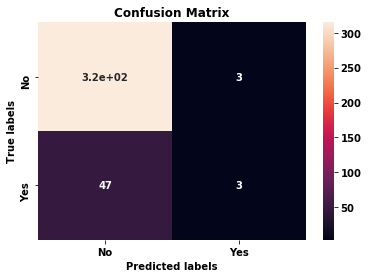

 
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       318
           1       0.50      0.06      0.11        50

    accuracy                           0.86       368
   macro avg       0.69      0.53      0.52       368
weighted avg       0.82      0.86      0.82       368



In [125]:
# Get the best weighting:
weighting = [grid_result.best_params_['class_weight'][0], 
             grid_result.best_params_['class_weight'][1]]


y_pred, model_confusion_matrix, model_classification_report = train_and_eval_Model(clf_model=LogisticRegression(class_weight=weighting),
                                                                                   X_train=X_train,
                                                                                   y_train=y_train,
                                                                                   X_test=X_test,
                                                                                   y_test=y_test,
                                                                                   confusion_mat_labels=employee_data_df_original['Attrition'],
                                                                                   model_name='Logistic Regression Classifier_Weighted_PCA')

### Observation:

Although this model did not perform better than the previous model, it shhould be noted that it was able to achieve similar performance with just 5 columns. In this case, PCA has computed the specified number of principal components and used it to project the dataset onto the vector space for the model to fit.

From the computed percentage of variance in data explained by each component, the output was:

[0.11780724, 0.08965895, 0.07604256, 0.07446388, 0.06635729]

Here, the 1st PC is holding 11.77% of the information, where the 2nd PC is holding 8.9% of the information and so on with the remaining components. This pattern suggests that this can be further tuned with Gridsearch to determine the optimum number of components for PCA.

## 7.4 - Restricted Boltzmann Machine (RBM) to create more features (non-parametric assumption).

RBM belong to a family of unsupervised feature learning algorithms that focus on the usage of probabilistic models to learn new features. The extracted new features from the original dataset can be utilised to enchance the ML pipeline. Typically, these features are better used with linear ML models like Linear Regression, Logistic Regression and so on. Being an unsupervised model, RBM does not require ground-truth labels and this is useful as it can be applied to a variety of ML tasks.

In [126]:
# Import the required libraries:
from sklearn.neural_network import BernoulliRBM

In [127]:
# Instantiate the Selector:
rbm = BernoulliRBM(n_components=256)

# Define the Pipeline Sequence: for preprocessing
pipe_preprocessing_featureEng = Pipeline(steps=[("drop_columns", cc_drop_columns),
                                                ("nominal_encoder", cc_nominal_encoder), 
                                                ("ordinal_encoder", cc_ordinal_encoder),
                                                ('scaler', scaler),
                                                ('rbm', rbm)]
                                        )

# Fit the Pipeline to the Dataset: for preprocessing
pipe_preprocessing_featureEng.fit(employee_data_df, y_employee_target_copy)

# Transform the Dataset: for preprocessing
employee_processed_df = pipe_preprocessing_featureEng.transform(employee_data_df)
x_employee_features = employee_processed_df

# Split the dataset:
X_train, X_test, y_train, y_test = train_test_split(x_employee_features, 
                                                    y_employee_target, 
                                                    test_size=0.25)


In [128]:
# Inspect the shape of the Features dataset:
x_employee_features.shape

(1470, 256)

#### Train and evaluate the model:

Logistic Regression Classifier_Weighted_PCA's Accuracy: 84.51%
Logistic Regression Classifier_Weighted_PCA's F1-Score: 29.63%
 
 === Plotting Confusion Matrix === 


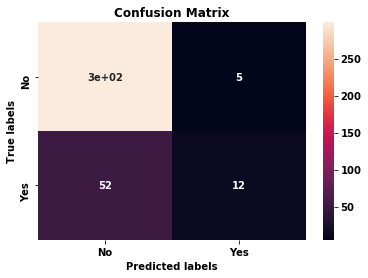

 
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       304
           1       0.71      0.19      0.30        64

    accuracy                           0.85       368
   macro avg       0.78      0.59      0.60       368
weighted avg       0.83      0.85      0.81       368



In [129]:
# Get the best weighting:
weighting = [grid_result.best_params_['class_weight'][0], 
             grid_result.best_params_['class_weight'][1]]


y_pred, model_confusion_matrix, model_classification_report = train_and_eval_Model(clf_model=LogisticRegression(class_weight=weighting, 
                                                                                                                max_iter=10000),
                                                                                   X_train=X_train,
                                                                                   y_train=y_train,
                                                                                   X_test=X_test,
                                                                                   y_test=y_test,
                                                                                   confusion_mat_labels=employee_data_df_original['Attrition'],
                                                                                   model_name='Logistic Regression Classifier_Weighted_PCA')

### Observation:

With the Restricted Boltzmann machine implemented to learn and extract more features compared to the original dataset (from 50 columns to 256 columns). Unfortunately, with the new columns, the model still underperformed compared to previous models. This means that further tuning is required to achieve better results and this will be implemented with the Gridsearch technique.

## 8 - Summary of all Feature Engineering Trials:

Feature engineering techniques that was considered and implemented:
1. Statistical-Based selection method on the existing features.
    - Pearson Correlations.
    - Hypothesis Testing. (P-values).
2. Model-based selection method on the existing features.
    - Tree-based models.
3. Principcal Component Analysis to transform the features (Parametric assumption).
4. Restricted Boltzmann Machine (RBM) to create more features (non-parametric assumption).

#### Below shows the summary results:

| Technique | Class | Accuracy (%) | F1-Score (%) | Precision (%) | Recall (%) | GridSearch (fine-tune) |
|  --- | --- | --- | --- | --- | --- | --- |
| Baseline Weighted LogReg | 0 (No, stayed) | 86 | 92 | 87 | 97 | None |
|  | 1 (Yes, left) |  | 47 | 72 | 35 |
|  --- | --- | --- | --- | --- | --- | --- |
| Pearson Correlations | 0 (No, stayed) | 88 | 93 | 89 | 98 | YES |
|  | 1 (Yes, left) |  | 48 | 80 | 34 |
|  --- | --- | --- | --- | --- | --- | --- |
| Hypothesis Testing (P-values) | 0 (No, stayed) | 87 | 93 | 87 | 99 | YES |
|  | 1 (Yes, left) |  | 22 | 78 | 13 |
|  --- | --- | --- | --- | --- | --- | --- |
| Tree-based model selection | 0 (No, stayed) | 83 | 91 | 83 | 1 | NO |
|  | 1 (Yes, left) |  | 3 | 100 | 2 |
|  --- | --- | --- | --- | --- | --- | --- |
| PCA | 0 (No, stayed) | 83 | 90 | 83 | 100 | YES |
|  | 1 (Yes, left) |  | 3 | 5 | 2 |
|  --- | --- | --- | --- | --- | --- | --- |
| RBM | 0 (No, stayed) | 84 | 91 | 86 | 96) | YES |
|  | 1 (Yes, left) |  | 27 | 50 | 19 |




## 9 - Fine-tuning the Model:

In this section, the hyperparameters of the different types of Feature engineering techniques will be fine-tuned to determine the best set of parameters that will generate the best performing model.

This will be done with the use of "GridSearchCV" module.

### 9.1 - Set up the Pipeline:

#### 9.1.1 - Define the Pre-processing Pipeline:

The sequence of the Pipeline:
1. Drop the unwanted columns.
2. One-hot encode the Nominal (categorical) values in the columns.
3. Encode the Ordinal (categorical) values in the columns.
4. Scale the features in the dataset.
5. Encode the Target variable to 0s and 1s:

These will be performed on the actual dataset (employee_data_df, not the copy of it).

In [130]:
# ==============================================================================
# 1. Drop the unwanted columns.
# ==============================================================================
# list the columns to drop:
columns_to_drop = ['EmployeeCount', 'Over18', 'StandardHours']

# Apply the custom encoder for Ordinal columns, instantiate:
cc_drop_columns = CustomDropUnwantedColumns(col=columns_to_drop)

# ==============================================================================
# 2. One-hot encode the Nominal (categorical) values in the columns:
# ==============================================================================
# Nominal Columns:
list_categorical_columns_nominal = ['Department', 'EducationField', 'Gender', 
                                    'JobRole', 'MaritalStatus', 'OverTime']

# Apply the custom encoder for Nominal columns, instantiate: similar to One-hot-encoding.
cc_nominal_encoder = CustomCategoryEncoder_nominal(cols= list_categorical_columns_nominal)

# ==============================================================================
# 3. Encode the Ordinal (categorical) values in the column:
# ==============================================================================
# Ordinal Columns:
list_categorical_columns_ordinal = ['BusinessTravel']

# Apply the custom encoder for Ordinal columns, instantiate:
cc_ordinal_encoder = CustomCategoryEncoder_ordinal(cols=list_categorical_columns_ordinal)

# ==============================================================================
# 4. Scale the features in the dataset:
# ==============================================================================
# scaler = scale_features_dataFrame()
scaler = MinMaxScaler()

# ==============================================================================
# 5. Encode the Target variable to 0s and 1s:
# ==============================================================================
# Done Above.

#### 9.1.2 - Define the Feature Engineering Pipeline:

The sequence of the Pipeline:
1. Statistical-Based selection method on the existing features.
    - Pearson Correlations.
    - Hypothesis Testing. (P-values).
2. Principcal Component Analysis to transform the features (Parametric assumption).
3. Restricted Boltzmann Machine (RBM) to create more features (non-parametric assumption).


In [131]:
# ==============================================================================
# 1. Statistical-Based selection method:
# ==============================================================================
# For Pearson Correlations:
cscs = CustomStatsCorrSelector(response=y_employee_target_copy, threshold=0.05)

# For Hypothesis Testing (P-values):
k_best_features = SelectKBest(score_func=f_classif)

# ==============================================================================
# 2. Principcal Component Analysis :
# ==============================================================================
pca = PCA()

# ==============================================================================
# 3. Restricted Boltzmann Machine (RBM):
# ==============================================================================
rbm = BernoulliRBM()



#### 9.2 - Transform the Dataset with Pipeline:

In [132]:
# Import the required Library:
from sklearn.pipeline import FeatureUnion

In [133]:
# Define the Preprocessing Pipeline Sequence: 
pipe_preprocessing = Pipeline(steps=[("drop_columns", cc_drop_columns),
                                     ("nominal_encoder", cc_nominal_encoder), 
                                     ("ordinal_encoder", cc_ordinal_encoder),
                                     ("corr", cscs), # Part of feature engineering, but required to be placed here
                                     ('scaler', scaler)]
                             )

# Define the Feature Engineering Pipeline (Feature Union) Sequence: ("corr", cscs)
pipe_featEng = FeatureUnion(transformer_list=[("k_best", k_best_features),
                                              ("pca", pca),
                                              ("rbm", rbm)]
                           )


# Overall Preprocessing + Feature Engineering Pipelines:
pipe_preprocessing_featureEng = Pipeline(steps=[("preprocessing", pipe_preprocessing),
                                                ("featureEngineering", pipe_featEng)])

# # Fit the Preprocessing + Feature Engineering Pipelines to the Dataset:
# pipe_preprocessing_featureEng.fit(employee_data_df, y_employee_target_copy)

# # Transform the Dataset:
# employee_processed_df = pipe_preprocessing_featureEng.transform(employee_data_df)
# x_employee_features = employee_processed_df

# # Split the dataset:
# X_train, X_test, y_train, y_test = train_test_split(x_employee_features, 
#                                                     y_employee_target, 
#                                                     test_size=0.25)

#### 9.3 - GridSearch the Hyperparameters:

For grid search, the orignal dataset is used as the input as it will be processed through the entire pipeline. Also note that GridSearchCV by default will perform 5-folds cross validation.pipe_modeling

In [134]:
# Get the best weighting for Logistic Regression Classifier: computed previously
weighting = [grid_result.best_params_['class_weight'][0], 
             grid_result.best_params_['class_weight'][1]]

# Overall Preprocessing + Feature Engineering + Classification Pipelines:
pipe_modeling = Pipeline(steps=[('P_featureEng', pipe_preprocessing_featureEng),
                                ('classifier', LogisticRegression(max_iter=10000, class_weight=weighting))])

# Define the parameters for the grid: dict
model_featEng_params = {'P_featureEng__preprocessing__corr__threshold': [0, 0.02, 0.05, 0.07],
                        'P_featureEng__featureEngineering__k_best__k': [range(1, x_employee_features.shape[1]-1)] + ['all'],
                        'P_featureEng__featureEngineering__pca__n_components': [2, 5, 10, 20, 30, 40, 50],
                        'P_featureEng__featureEngineering__rbm__n_components': [10, 50, 100, 200, 300, 400],
                        'P_featureEng__featureEngineering__rbm__n_iter': [50, 100, 200],
                        'classifier__C': [1e-2, 1e-1, 1e0],
                       }

# Run the Gridsearch Model:
grid = get_best_model_and_accuracy(model=pipe_modeling,
                                   params=model_featEng_params, 
                                   X=employee_data_df, 
                                   y=y_employee_target)

Best Accuracy: 87.755%
Best Parameters: {'P_featureEng__featureEngineering__k_best__k': 'all', 'P_featureEng__featureEngineering__pca__n_components': 30, 'P_featureEng__featureEngineering__rbm__n_components': 10, 'P_featureEng__featureEngineering__rbm__n_iter': 200, 'P_featureEng__preprocessing__corr__threshold': 0.02, 'classifier__C': 0.1}
Average Time to Fit (s): 1.834
Average Time to Score (s): 0.006


### Observation:
Comparing the results from the Gridsearch model to the Baseline (Baseline Logistic Regression Classifier_Weighted's Accuracy: 85.87%), the improvements with feature engineering increased the accuracy by ~3%. Although this is not much, the did improve. 

List of the best Parameters found:

Best Accuracy: __87.687__% \
Best Parameters: {'P_featureEng__featureEngineering__k_best__k': 'all', 'P_featureEng__featureEngineering__pca__n_components': 30, 'P_featureEng__featureEngineering__rbm__n_components': 300, 'P_featureEng__featureEngineering__rbm__n_iter': 100, 'P_featureEng__preprocessing__corr__threshold': 0.02, 'classifier__C': 0.1}
Average Time to Fit (s): 1.712
Average Time to Score (s): 0.006

Note that further tuning can be done where a GridSearch of the parameters closer to the ones above can be set to determine even better model performance. 



#### Let's examine if the model performs better with computed class weights:

Rather than using the grid searched class weights, the computed class weights will be utilised here and paired with the best parameters above.

Computed Class weights -> [0.59610706, 3.10126582]


In [135]:
# Get the best weighting for Logistic Regression Classifier: computed as [0.59610706, 3.10126582]
weighting = [0.59610706, 3.10126582]

# Overall Preprocessing + Feature Engineering + Classification Pipelines:
pipe_modeling = Pipeline(steps=[('P_featureEng', pipe_preprocessing_featureEng),
                                ('classifier', LogisticRegression(max_iter=10000, class_weight=weighting))])

# Define the parameters for the grid: dict
model_featEng_params = {'P_featureEng__featureEngineering__k_best__k': ['all'], 
                        'P_featureEng__featureEngineering__pca__n_components': [30], 
                        'P_featureEng__featureEngineering__rbm__n_components': [300], 
                        'P_featureEng__featureEngineering__rbm__n_iter': [100], 
                        'P_featureEng__preprocessing__corr__threshold': [0.02], 
                        'classifier__C': [0.1]}

# Run the Gridsearch Model:
grid = get_best_model_and_accuracy(model=pipe_modeling, 
                                   params=model_featEng_params, 
                                   X=employee_data_df, 
                                   y=y_employee_target)


Best Accuracy: 87.755%
Best Parameters: {'P_featureEng__featureEngineering__k_best__k': 'all', 'P_featureEng__featureEngineering__pca__n_components': 30, 'P_featureEng__featureEngineering__rbm__n_components': 300, 'P_featureEng__featureEngineering__rbm__n_iter': 100, 'P_featureEng__preprocessing__corr__threshold': 0.02, 'classifier__C': 0.1}
Average Time to Fit (s): 3.512
Average Time to Score (s): 0.011


### Observation:

Evidently, this model did not perform better. Therefore the previous model that considers the weighting of [1 ,1] will be used as the final model.


## 10 - Making Predictions with Final Model:

In this section, the output predictions from the model can be accomplished.

In [136]:
def predict_stay_leave(x_data, grid_model, output_col_name):
    """ This function will take in a DataFrame of Employee data (Columns same as original data),
        and used the Trained Model to predict the outcome. 
    Parameters:
        - x_data, is the input test data.
        - grid_model, is the trained Grid searched model.
        - output_col_name, is the target column's name.
    Returns:
        - returns a DataFrame of the predictions.
    Notes:
        - N/A
    """
    # Make a copy of the input data:
    X_sample_employee = x_data
    
    # Transform data with preprocessing + feature engineering pipeline:
    X_test_for_prediction = grid_model.best_estimator_.named_steps['P_featureEng'].transform(X_sample_employee)
    
    # Compute the predictions:
    predictions_on_employees = grid_model.best_estimator_.named_steps['classifier'].predict(X_test_for_prediction)
    
    # Convert back to dataFrame with the correct Labels:
    predictions_on_employees_df = pd.DataFrame(data=predictions_on_employees, index=X_sample_employee.index, columns=[output_col_name])
    predictions_on_employees_df = predictions_on_employees_df[output_col_name].apply(lambda x: "Yes" if x == 1 else "No")
    
    return predictions_on_employees_df.to_frame()

#### Set up the Correct Model:

In [137]:
# Get the best weighting for Logistic Regression Classifier: computed as [0.59610706, 3.10126582]
weighting = [grid_result.best_params_['class_weight'][0], 
             grid_result.best_params_['class_weight'][1]]

# Overall Preprocessing + Feature Engineering + Classification Pipelines:
pipe_modeling = Pipeline(steps=[('P_featureEng', pipe_preprocessing_featureEng),
                                ('classifier', LogisticRegression(max_iter=10000, class_weight=weighting))])

# Define the parameters for the grid: dict
model_featEng_params = {'P_featureEng__featureEngineering__k_best__k': ['all'], 
                        'P_featureEng__featureEngineering__pca__n_components': [30], 
                        'P_featureEng__featureEngineering__rbm__n_components': [300], 
                        'P_featureEng__featureEngineering__rbm__n_iter': [100], 
                        'P_featureEng__preprocessing__corr__threshold': [0.02], 
                        'classifier__C': [0.1]}

# Run the Gridsearch Model:
grid = get_best_model_and_accuracy(model=pipe_modeling, 
                                   params=model_featEng_params, 
                                   X=employee_data_df, 
                                   y=y_employee_target)


Best Accuracy: 87.551%
Best Parameters: {'P_featureEng__featureEngineering__k_best__k': 'all', 'P_featureEng__featureEngineering__pca__n_components': 30, 'P_featureEng__featureEngineering__rbm__n_components': 300, 'P_featureEng__featureEngineering__rbm__n_iter': 100, 'P_featureEng__preprocessing__corr__threshold': 0.02, 'classifier__C': 0.1}
Average Time to Fit (s): 3.316
Average Time to Score (s): 0.011


In [145]:
y_employee_target

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [138]:
# Take a random sample of 100 employees from the dataset: instead of creating new entries to the dataset.
X_sample_employee = employee_data_df.sample(n=100, random_state=101)
X_sample_employee.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
353,37,Travel_Rarely,1319,Research & Development,6,3,Medical,1,474,3,...,1,80,2,13,2,3,7,7,6,7
812,43,Travel_Frequently,1082,Research & Development,27,3,Life Sciences,1,1126,3,...,3,80,1,18,1,3,8,7,0,1
449,39,Travel_Frequently,443,Research & Development,8,1,Life Sciences,1,602,3,...,1,80,1,8,3,3,8,3,0,7
1168,24,Travel_Frequently,567,Research & Development,2,1,Technical Degree,1,1646,1,...,3,80,0,6,2,3,6,3,1,3
969,48,Travel_Rarely,855,Research & Development,4,3,Life Sciences,1,1363,4,...,3,80,0,11,2,3,10,9,0,8


In [139]:
predictions_on_employees_df, employees_stay, employees_leave = predict_stay_leave(x_data=X_sample_employee, 
                                                                                  grid_model=grid, 
                                                                                  output_col_name='Attrition')
employee_prediction_df

,Attrition
353,No
812,No
449,No
1168,Yes
969,No
...,...
1224,No
304,No
1227,No
104,No


#### Examine the Employees that wants to Leave:

In [140]:
employee_prediction_df[employee_prediction_df["Attrition"] == 'Yes']

,Attrition
1168,Yes
2,Yes
0,Yes
132,Yes
1365,Yes
336,Yes
1436,Yes
683,Yes
